<a href="https://colab.research.google.com/github/DamaKubu/DiSaugumas/blob/main/MIFbakis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imanoma padaryt, jog nereiktu, bet neveik kap turetu
 tai tsg naudoti bibliotekas, kaip Alice naudojo

In [ ]:
#sitas dalykas permanently i collab instaliuoja bibliotekas :)
'''
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

!pip install --target=$nb_path git+https://github.com/JadenFiotto-Kaufman/nnsight.git@mambainterp
'''

"\nimport os, sys\nfrom google.colab import drive\ndrive.mount('/content/drive')\nnb_path = '/content/notebooks'\nos.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)\nsys.path.insert(0,nb_path)\n\n!pip install --target=$nb_path git+https://github.com/JadenFiotto-Kaufman/nnsight.git@mambainterp\n"

In [ ]:
'''
!pip install jedi>=0.16 #kazkaip ten gal pades su skirtingom versijom tikiuosi,nebus bugsu
#bet jei bus bugsu tai todel,kad per naujos versijos ar some bs like dat.
# Install nnsight
#!pip install --target=$nb_path  nnsight==0.2.3.dev0

#!pip install nnsight
!pip install --target=$nb_path  causal-conv1d>=1.1.0
!pip install --target=$nb_path  mamba-ssm
# supposedly to debug missing "libcuda.so"
!echo /usr/lib64-nvidia/ >/etc/ld.so.conf.d/libcuda.conf; ldconfig

#import os
#os.listdir()

'''

'\n!pip install jedi>=0.16 #kazkaip ten gal pades su skirtingom versijom tikiuosi,nebus bugsu\n#bet jei bus bugsu tai todel,kad per naujos versijos ar some bs like dat.\n# Install nnsight\n#!pip install --target=$nb_path  nnsight==0.2.3.dev0\n\n#!pip install nnsight\n!pip install --target=$nb_path  causal-conv1d>=1.1.0\n!pip install --target=$nb_path  mamba-ssm\n# supposedly to debug missing "libcuda.so"\n!echo /usr/lib64-nvidia/ >/etc/ld.so.conf.d/libcuda.conf; ldconfig\n\n#import os\n#os.listdir()\n\n'

# Teksto vienetai(angl. tokens)

Darbe naudoju teksto vieneto generuotoją(angl. tokenizer)
https://huggingface.co/EleutherAI/gpt-neox-20b
tai yra modelis panašaus dydžio į GPT3, kuris yra ištreniruotas ant "the Pile" kokybiško teksto 825Gb skirto kalbos modelių treniravimui.

Jis ištreniruotas anglų kalbai, tad kitų kalbų žodžius skaido į daug daugiau teksto vienetų, negu anglų.


In [ ]:
# Biški parodysiu kaip veikia teksto vienetai
# ir Embedingas? na gal visgi ne nes nėra laiko tam.


#paimu https://huggingface.co/EleutherAI/gpt-neox-20b
#sitas modelis yra treniruotas
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.pad_token_id = tokenizer.eos_token_id


teksto_vienetai_lt       = tokenizer.tokenize("Danielius yra studentas")
teksto_vienetai          = tokenizer.tokenize("love math, hate spam    ")
teksto_vienetai_skaiciai = tokenizer.tokenize("123456 ir 42, 11001203")
clear_output()
teksto_vienetai_lt,teksto_vienetai, teksto_vienetai_skaiciai

NameError: name 'AutoTokenizer' is not defined

In [ ]:
a=tokenizer("Danielius yra studentas")["input_ids"]
b=tokenizer.tokenize("Danielius yra studentas")
a,b

([24526, 3750, 340, 376, 5974, 284],
 ['Daniel', 'ius', 'Ġy', 'ra', 'Ġstudent', 'as'])

In [ ]:
#Štai čia koduojami, mažiausio skaičiaus tokenai,
#tikriausai da=niausiai pasitaikantys duomenyse.
tokenizer.batch_decode([i for i in range(30)])

['<|endoftext|>',
 '<|padding|>',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<']

In [ ]:
tokenizer.batch_decode([i for i in range(6390,6394)])

['ipped', ' buffer', ' CO', ' Mary']

NameError: name 'model' is not defined

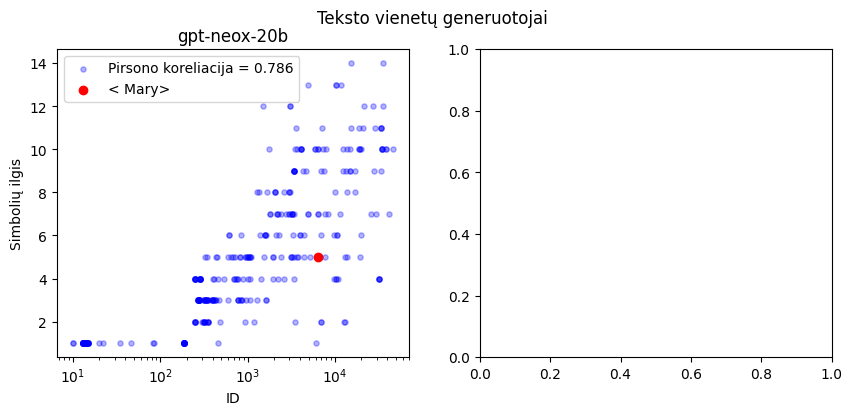

In [ ]:
#galime panagrinėti kalbą
#pavyzdžiui žodžio ilgis vs. jo eilė
#spėju jog trumpesni žodžiai yra dažnesni, tad jų eilė irgi mažesnė

TEKSTAS = '''Foundation models, now powering most of the exciting applications in deep learning, are almost universally
based on the Transformer architecture and its core attention module. Many subquadratic-time architectures
such as linear attention, gated convolution and recurrent models, and structured state space models (SSMs)
have been developed to address Transformers’ computational inefficiency on long sequences, but they have not
performed as well as attention on important modalities such as language. We identify that a key weakness of
such models is their inability to perform content-based reasoning, and make several improvements. First, simply
letting the SSM parameters be functions of the input addresses their weakness with discrete modalities, allowing
the model to selectively propagate or forget information along the sequence length dimension depending on
the current token. Second, even though this change prevents the use of efficient convolutions, we design a
hardware-aware parallel algorithm in recurrent mode. We integrate these selective SSMs into a simplified
end-to-end neural network architecture without attention or even MLP blocks (Mamba). Mamba enjoys fast
inference (5× higher throughput than Transformers) and linear scaling in sequence length, and its performance
improves on real data up to million-length sequences. As a general sequence model backbone, Mamba achieves
state-of-the-art performance across several modalities such as language, audio, and genomics. On language
modeling, our Mamba-3B model outperforms Transformers of the same size and matches Transformers twice
its size, both in pretraining and downstream evaluation.
'''



#tokenizer.batch_decode([tokenizer("Danielius yra studentas")["input_ids"]])

#with open('Evolution-Douglas-J-Futuyma_djvu.txt') as file:
   #TEKSTAS  = file.read()
TV_eile  = tokenizer(TEKSTAS)["input_ids"]
TV_ilgis = [len(i) for i in tokenizer.batch_decode(TV_eile)]

fig, (ax, ax2) = plt.subplots(1,2, figsize =(10,4), sharey=False)
fig.suptitle('Teksto vienetų generuotojai')
ax.set_title('gpt-neox-20b')
ax.scatter(TV_eile, TV_ilgis, alpha=0.3,s=14, color='blue', label=f"Pirsono koreliacija = {np.corrcoef(np.log(TV_eile),TV_ilgis)[0][1]:0.3}")
ax.scatter(6393, 5, color='red', label =f'< Mary>')
ax.set_ylabel("Simbolių ilgis")
ax.set_xlabel("ID")
#plt.yscale('log')
ax.set_xscale('log')
ax.legend()
#matome, jog yra koreliacija, bet ne itin paprasta
#plt.savefig('tokenuvertes.png',dpi=500)

#model.tokenizer.decode([6393]))
TV_eile2  = model.tokenizer(TEKSTAS)["input_ids"]
TV_ilgis2 = [len(i) for i in model.tokenizer.batch_decode(TV_eile2)]

ax2.set_title('GPT2')
ax2.scatter(TV_eile2, TV_ilgis2, alpha=0.3,s=14, color='blue', label=f"Pirsono koreliacija = {np.corrcoef(np.log(TV_eile2),TV_ilgis2)[0][1]:0.3}")
ax2.scatter(5335, 5, color='red', label =f'< Mary>')
ax2.set_ylabel("Simbolių ilgis")
ax2.set_xlabel("ID")
#plt.yscale('log')
ax2.set_xscale('log')
ax2.legend()

plt.savefig('tokenizeriai2.png',dpi=300)

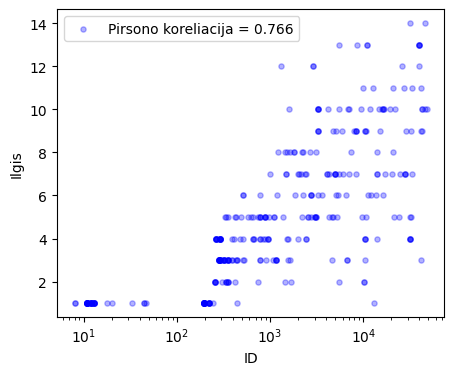

In [ ]:

#matome, jog yra koreliacija, bet ne itin paprasta
#plt.savefig('tokenuvertes.png',dpi=500)


In [ ]:
#galima dar su matematikos simboliais bet užteks.

# Get the vocabulary indices for the correct and incorrect prediction
john_index   = tokenizer(" John")["input_ids"]
mary_index = tokenizer(" Mary")["input_ids"]

print(f"' John': {john_index}")
print(f"' Mary': {mary_index}")

' John': [2516]
' Mary': [6393]


### Karpathy tokenizer

* Teksto Vieneto(TV) parinkimas ir kodavimas nėra trivialus uždavinys.
* Anglų kalba pats TV yra geriau ištreniruojamas, ir naudoja trumpus TV kodus, tuo pačiu metu kitų kalbų TV yra kur kas ilgesni, tad ta pati informacija, kitomis kalbomis užrašoma pasitelkiant daugiau TV.



https://www.youtube.com/watch?v=zduSFxRajkE&ab_channel=AndrejKarpathy
https://tiktokenizer.vercel.app/

In [ ]:
mamba_model = MambaInterp("MrGonao/delphi-mamba-100k", device="cuda")
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.pad_token_id = tokenizer.eos_token_id

tekstas = "Kokie keisti tie medžiai rudenį ima ir nusirengia."

#unicode
Unicode = [ord(i) for i in tekstas]
UTF8 = list(tekstas.encode("utf-8"))
smth = list(tekstas.encode(encoding="ascii", errors= "ignore"))
print(tekstas, '\n')
print('unicode =', Unicode)
print('UTF8    =', UTF8)
print('smth    =', smth)

print('Teksto vienetai:\n')
print('delphi_small =', mamba_model.tokenizer(tekstas)["input_ids"])
print('mamba_big    =', tokenizer(tekstas)["input_ids"])



print(f" len(tekstas) = { len(tekstas)}\n len(unicode) = {len(Unicode)}\n len(utf-8)   = {len(UTF8)}")
print(f" len(ascii)   =",len(smth))
print(f"len(delphi_TV)=",len(mamba_model.tokenizer(tekstas)["input_ids"]))
print("len(mamba_TV))=", len(tokenizer(tekstas)["input_ids"]))

tokenizer_config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/64.5k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/196 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Kokie keisti tie medžiai rudenį ima ir nusirengia. 

unicode = [75, 111, 107, 105, 101, 32, 107, 101, 105, 115, 116, 105, 32, 116, 105, 101, 32, 109, 101, 100, 382, 105, 97, 105, 32, 114, 117, 100, 101, 110, 303, 32, 105, 109, 97, 32, 105, 114, 32, 110, 117, 115, 105, 114, 101, 110, 103, 105, 97, 46]
UTF8    = [75, 111, 107, 105, 101, 32, 107, 101, 105, 115, 116, 105, 32, 116, 105, 101, 32, 109, 101, 100, 197, 190, 105, 97, 105, 32, 114, 117, 100, 101, 110, 196, 175, 32, 105, 109, 97, 32, 105, 114, 32, 110, 117, 115, 105, 114, 101, 110, 103, 105, 97, 46]
smth    = [75, 111, 107, 105, 101, 32, 107, 101, 105, 115, 116, 105, 32, 116, 105, 101, 32, 109, 101, 100, 105, 97, 105, 32, 114, 117, 100, 101, 110, 32, 105, 109, 97, 32, 105, 114, 32, 110, 117, 115, 105, 114, 101, 110, 103, 105, 97, 46]
Teksto vienetai:

delphi_small = [1, 873, 4027, 4046, 597, 721, 649, 4031, 2236, 2290, 200, 193, 573, 4031, 1278, 2182, 199, 178, 915, 4025, 4023, 308, 290, 641, 1759, 1159, 573, 4037]
mamba_big    = 

In [ ]:
#Šitiem reikia
TV_eile2  = mamba_model.tokenizer(TEKSTAS)["input_ids"]
TV_ilgis2 = [len(i) for i in mamba_model.tokenizer.batch_decode(TV_eile2)]

TV_eile3  = llama_model.tokenizer(TEKSTAS)["input_ids"]
TV_ilgis3 = [len(i) for i in llama_model.tokenizer.batch_decode(TV_eile3)]




fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(TV_eile2, TV_ilgis2)
ax[0].set_ylabel("ilgis len('žmogus') = 5")
ax[0].set_xlabel("eilė token('žmogus') = 12423")
ax[0].set_yscale('log')
ax[0].set_xscale('log')


ax[1].scatter(TV_eile3, TV_ilgis3)
ax[1].set_ylabel("ilgis len('žmogus') = 5")
ax[1].set_xlabel("eilė token('žmogus') = 12423")
ax[1].set_yscale('log')
ax[1].set_xscale('log')

TV_eile2 == TV_eile3 #okey tai delphi lama, bei delphi mamba modeliai
#aiskiai turi ta pati tokenizeri! :)

NameError: name 'llama_model' is not defined

# 100k ir 130M parametrų mamba modeliai

*   duodame įvestį ir gauname abiem atvejais išvestį.
* Rezultatas, 130M vos kažką naudingo atlieka, tai 100k nelabai ir įdomus, gal nebent kažką super paprasto.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.pad_token_id = tokenizer.eos_token_id
mamba_model = MambaInterp("state-spaces/mamba-130m", device="cuda", tokenizer=tokenizer)
#mamba_model = MambaInterp("state-spaces/mamba-790m", device="cuda", tokenizer=tokenizer)

#lets go with tiny storie so 100k would have a chance at smth
prompt = "Once upon a time, there were two best friends, Joe and Grace.\
 They were always playing together and having so much fun.\
  One day, Joe and Grace decided to go to the town's marketplace.\
   When they got there, they saw a vendor with lots of colorful balloons.\
    Joe wanted one so badly, "

    #
    # but he didn't have enough money.\
    # Grace saw how sad Joe was and wanted to help.\
    #  She asked her mom to bring some money so Joe could buy a balloon.\
    #   When Grace's mom arrived she saw that Joe wanted a deep red balloon.\
    #    Joe was so relieved to be able to buy it after his friend helped him.\
    #     Grace said to Joe, \"Remember, if you help a friend in need,\
    #      you will always be rewarded!\" Joe and Grace smiled and hugged each other,\
    #       walked away with the deep red balloon, proud of the lesson they had" # learnt."


#prompt = "Peter and Anna were walking outside. Peter said to Anna I love you. Anna said to "
#mazas>  Once and his were playing in. They was, the,' to, was, herV
#didelis>  I, the down the was, Anna,'m you, She said to Peter
#well better bet still shit

#prompt = "Peter and Anna were walking outside. Peter said to "
#gan garbage duoda, pridedant gale space nesikeicia tik biski 100k gale v isiterpia
#>mazas> > Once and his were playing in. They was, theV
#>didelis>, I, the down the was, Anna

#prompt = "123123123123123123123123123123123123123123"
# We load in a TinyStories mamba model


prompt = "When Mary and John went to the store, John gave a drink to"


mamba_model_tiny = MambaInterp("MrGonao/delphi-mamba-100k", device="cuda")

with mamba_model_tiny.invoke(prompt) as invoker:#crazy veik, yee not rlly
    logits = mamba_model_tiny.lm_head.output.save()

print('mamba tiny logits =  \n', logits.value, '\n ---------------------')

with mamba_model.invoke(prompt) as invoker:
    logits2 = mamba_model.lm_head.output.save()

print('mamba big logits =  \n', logits2.value, '\n ---------------------')

print('mamba_tiny = ', mamba_model_tiny, '\n ---------------------')
print('mamba_big = ', mamba_model, '\n ---------------------')
#okay vel tas pats turem, kodel tien dout skaiciukus o cia pointeri??
clear_output()

In [ ]:
print('input> ', prompt, '\n\n')



# Pritaikome softmax funkciją logitams, kad gautume tikimybes
probabilities = softmax(logits.value, dim=-1)
#print('Skirtingų teksto vienetų tikimybės =\n',probabilities,'\n --------')
#logitu ir prob formos sutampa
#logits.value.shape, probabilities.shape

#out token
out = torch.argmax(probabilities, dim = -1)
out_text = mamba_model_tiny.tokenizer.batch_decode([out[0][-1]])[0]
print('100k mamba sako: \n>',out_text,'\n')


# Randame didžiausios tikimybės indeksus
# predicted_indices = torch.argmax(probabilities, dim=-1)

probabilities_big = softmax(logits2.value, dim=-1)
logits2.value.shape, probabilities_big.shape


#out token
maxi = torch.argmax(probabilities_big, dim = -1) #gi norime tik paskutines linijos yes!

#out = [out.ite]
out_text = mamba_model.tokenizer.batch_decode(maxi)[0] #nes returnina list tai pop out

#print('didele mamba sako: \n>',out_text,'\n')

out_paskutinis=  mamba_model.tokenizer.batch_decode([maxi[0][-1]])[0]
print('130M mamba sako: \n>', out_paskutinis)

#print('\n\nmazos mamba TV:\n', out,'\n\n')
#print('dideles mambos TV:\n', maxi)

input>  1234567 


100k mamba sako: 
>  

130M mamba sako: 
>  Mary


# Mažieji tranformerių ir Mamba modeliai 100k

tinystories modeliai
- pabandykim priversti juos kalbėti!
- tada pabandykim, jog didieji modeliukai kalbėtu

-

In [ ]:





#NEBEVEIK lamma modelis !!! RuntimeError: User specified an unsupported autocast device_type 'meta'

# We load in a TinyStories llama model
#llama_model = LanguageModel("delphi-suite/delphi-llama2-100k",)
# Set the clean and corrupt prompts
clean_prompt = "Once upon a time, John and Mary went shopping. After John and Mary went to the store, Mary gave a bottle of milk to"
corrupted_prompt = (
    "Once upon a time, John and Mary went shopping. After John and Mary went to the store, John gave a bottle of milk to"
)

# Get the vocabulary indices for the correct and incorrect prediction
correct_index = llama_model.tokenizer("John")["input_ids"][1]
incorrect_index = llama_model.tokenizer("Mary")["input_ids"][1]

print("lamma delphi 100k modelis koduoja")
print(f"' John': {correct_index}")
print(f"' Mary': {incorrect_index}")



#vakar veikė, šnd nebeveikia.
# We load in a TinyStories mamba model
mamba_model = MambaInterp("MrGonao/delphi-mamba-100k", device="cuda")
# Set the clean and corrupt prompts
clean_prompt = "Once upon a time, John and Mary went shopping. After John and Mary went to the store, Mary gave a bottle of milk to"
corrupted_prompt = (
    "Once upon a time, John and Mary went shopping. After John and Mary went to the store, John gave a bottle of milk to"
)

# Get the vocabulary indices for the correct and incorrect prediction
correct_index = mamba_model.tokenizer("John")["input_ids"][1]
incorrect_index = mamba_model.tokenizer("Mary")["input_ids"][1]
print('\n mamba delphi 100k modelis koduoja')
print(f"' John': {correct_index}")
print(f"' Mary': {incorrect_index}")

#kas keista, jog pridejus tarpeli pries zodi,
# tai jau gaunam jog abieju tokenu kodavimas sutampa :o
#abu lygus ahm stupid lol, pamirsau tsg 4023 cj tsg space tada
print("\nJohn ", mamba_model.tokenizer(" John")["input_ids"])
print("Mary ", mamba_model.tokenizer(" Mary")["input_ids"])
print(" ", mamba_model.tokenizer(" ")["input_ids"])
#yes, idomu, jog didelio modelio tai atvaizduoja i skirtingus dalykus.



RuntimeError: User specified an unsupported autocast device_type 'meta'

# GPT2

In [ ]:
from nnsight import LanguageModel

model = LanguageModel('openai-community/gpt2', device_map="auto")

#print(model)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Token IDs: tensor([[ 262,   12,  417, 8765,   11,  257,  262, 3504,  338, 3576]],
       device='cuda:0')
 the-el Tower, a the middle's London
------------
Prediction:  London


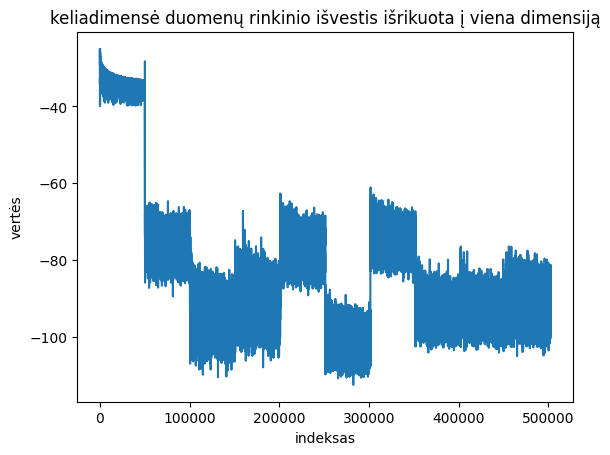

logits  tensor([[ 262,   12,  417, 8765,   11,  257,  262, 3504,  338, 3576]],
       device='cuda:0')


Text(0.5, 0, 'indeksas')

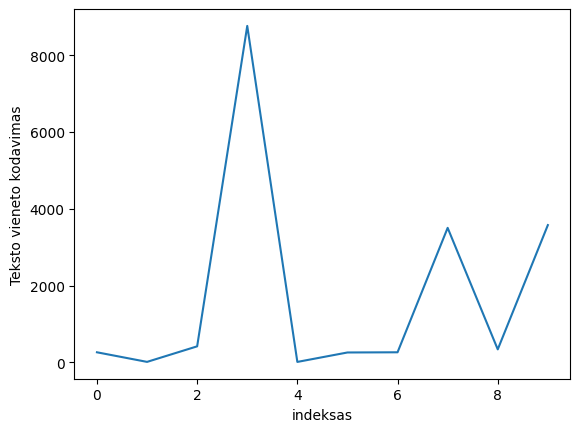

In [ ]:
#with model.trace():
prompt = 'The Eiffel Tower is in the city of'

from nnsight import LanguageModel

model = LanguageModel('openai-community/gpt2', device_map="auto")

with model.invoke(prompt) as invoker:
  # Access the last layer using h[-1] as it's a ModuleList
  # Access the first index of .output as that's where the hidden states are.
  model.transformer.h[-1].mlp.output[0][:] = 0
  logits = model.lm_head.output.save()
  # Logits come out of model.lm_head and we apply argmax to get the predicted token ids.
  token_ids = model.lm_head.output.argmax(dim=-1).save()

print("Token IDs:", token_ids.value)
print(model.tokenizer.decode(token_ids.value[0][:]))
print('------------')
# Apply the tokenizer to decode the ids into words after the tracing context.
print("Prediction:", model.tokenizer.decode(token_ids.value[0][-1]))


eilute = logits.value.cpu().numpy().flatten()
plt.plot(eilute) #cia vieno outputo
plt.ylabel('vertės')
plt.title('keliadimensė duomenų rinkinio išvestis išrikuota į viena dimensiją')
plt.xlabel('indeksas')
plt.show()

print('logits ',logits.value.argmax(dim=-1))

eilute = token_ids.value.cpu().numpy().flatten()
plt.plot(eilute) #cia vieno outputo
plt.ylabel('Teksto vieneto kodavimas')
#plt.title('hey baby')
plt.xlabel('indeksas')
#okey lovely, tai gaunu lygiai tą patį ir gpt2 atveju.

In [ ]:
print(model.tokenizer.decode([6393]))
model.tokenizer.encode(' Mary')

 essential


[5335]

In [ ]:
#kiekvienas blokelis atitinka, vieną token, yra 10 blokelių ir 10

In [ ]:
print('logits ',logits.value.argmax(dim=-1))
print(max(logits.value[0][0]))


logits  tensor([[ 262,   12,  417, 8765,   11,  257,  262, 3504,  338, 3576]],
       device='cuda:0')
tensor(-25.0328, device='cuda:0')


In [ ]:
[max(line) for line in logits.value[0]]


[tensor(-25.0328, device='cuda:0'),
 tensor(-64.3407, device='cuda:0'),
 tensor(-74.0558, device='cuda:0'),
 tensor(-67.1889, device='cuda:0'),
 tensor(-62.6958, device='cuda:0'),
 tensor(-86.4701, device='cuda:0'),
 tensor(-61.1017, device='cuda:0'),
 tensor(-79.0920, device='cuda:0'),
 tensor(-76.4729, device='cuda:0'),
 tensor(-76.4731, device='cuda:0')]

In [ ]:
[line.argmax() for line in logits.value[0]] #cia duoda eilutes numeri kuri yra didziausia?

[tensor(262, device='cuda:0'),
 tensor(12, device='cuda:0'),
 tensor(417, device='cuda:0'),
 tensor(8765, device='cuda:0'),
 tensor(11, device='cuda:0'),
 tensor(257, device='cuda:0'),
 tensor(262, device='cuda:0'),
 tensor(3504, device='cuda:0'),
 tensor(338, device='cuda:0'),
 tensor(3576, device='cuda:0')]

In [ ]:
[line[line.argmax()] for line in logits.value[0]]#yep returnina ko ir tikejaus
#tsg maximalu duoda, tai kiekvienas tas chunk yra tikimybes, zodziu, ir jis tsg pasirenka didziausia to listo elementą.

[tensor(-25.0328, device='cuda:0'),
 tensor(-64.3407, device='cuda:0'),
 tensor(-74.0558, device='cuda:0'),
 tensor(-67.1889, device='cuda:0'),
 tensor(-62.6958, device='cuda:0'),
 tensor(-86.4701, device='cuda:0'),
 tensor(-61.1017, device='cuda:0'),
 tensor(-79.0920, device='cuda:0'),
 tensor(-76.4729, device='cuda:0'),
 tensor(-76.4731, device='cuda:0')]

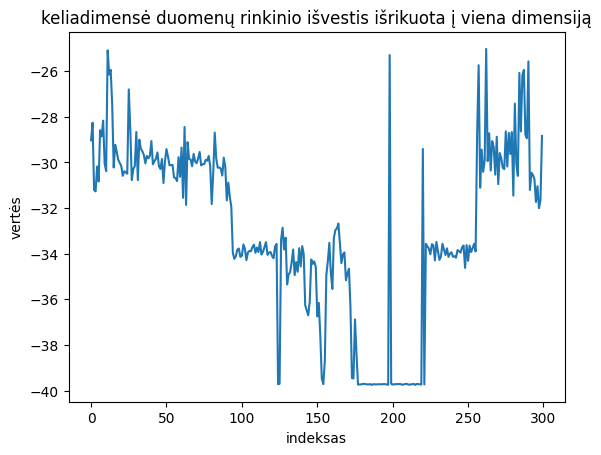

In [ ]:

eilute = logits.value.cpu().numpy().flatten()
plt.plot(eilute[:300]) #cia vieno outputo
plt.ylabel('vertės')
plt.title('keliadimensė duomenų rinkinio išvestis išrikuota į viena dimensiją')
plt.xlabel('indeksas')
plt.show()

In [ ]:
eilute = logits[0][0].value.cpu().numpy().flatten()
plt.plot(eilute[:]) #cia vieno outputo
plt.ylabel('vertės')
plt.title('keliadimensė duomenų rinkinio išvestis išrikuota į viena dimensiją')
plt.xlabel('indeksas')
plt.show()



NameError: name 'logits' is not defined

In [ ]:
#paziurim kokie kiti londono artimiausi pasirinkimai buvo!

#print("Token IDs:", token_ids.value)
#print(model.tokenizer.decode(logits.topk(1)))
print('------------')
# Apply the tokenizer to decode the ids into words after the tracing context.
#print("Prediction:", model.tokenizer.decode(token_ids.value[0][-1]))

model.tokenizer.decode(logits.value[0][-1].topk(10)[-1])

------------


' London Paris Berlin Amsterdam New Hamburg Cologne San Istanbul Brussels'

array([[1.        , 0.19047619],
       [0.19047619, 1.        ]])

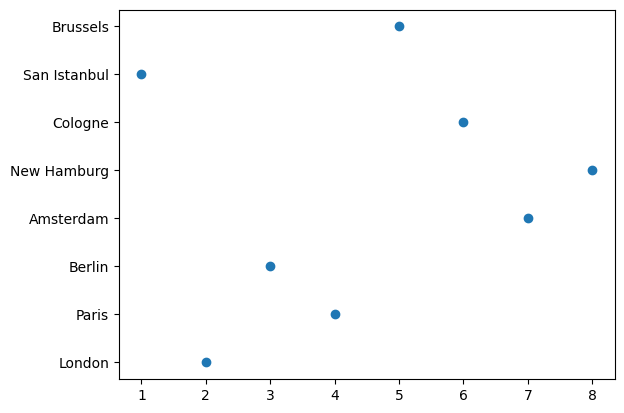

In [ ]:
#Kas išties labai protinga! nes jie sudelioti, tsg pagal dydi
#miestai isdelioti pagal dydi atitinka tuos pacius miestus isdeliotus pagal ranką.

#"1","Istanbul, Turkey","15.57 million people"
#"2","London, Greater London, United Kingdom","8.8 million people"
#"3","Berlin, Germany","3.677 million people"
#"4","Paris, île-de-France, France","2.165 million people"
#"5","Brussels, Belgium","1.114 million people"
#"6","Cologne, North Rhine-Westphalia, Germany","1.082 million people"
#"7","Amsterdam, North Holland, Netherlands","851573 people"
#"8","San, Ségou, Mali","24811 people"
#"9","New Hamburg, Ontario, Canada","8424 people"


#plt.scatter(['London' ,'Paris', 'Berlin', 'Amsterdam', 'New Hamburg', 'Cologne','San Istanbul', 'Brussels'],\
       #['San Istanbul','London','Berlin','Paris', "Brussels", "Cologne", 'Amsterdam', 'New Hamburg'])

plt.scatter([2, 4, 3, 7, 8, 6, 1, 5],['London' ,'Paris', 'Berlin', 'Amsterdam', 'New Hamburg', 'Cologne','San Istanbul', 'Brussels'])
#cia koreliacijos plotas, tarp dydzio ir gpt spejimo, koreliacija yra nors ir nedidele.
np.corrcoef([[2, 4, 3, 7, 8, 6, 1, 5],[1,2,3,4,5,6,7,8]])

In [ ]:
with model.invoke(prompt) as invoker:


  # Access the last layer using h[-1] as it's a ModuleList
  # Access the first index of .output as that's where the hidden states are.
  model.transformer.h[-1].mlp.output[0][:] = 0
  logits1 = model.lm_head.output.save()
  # Logits come out of model.lm_head and we apply argmax to get the predicted token ids.
  token_ids = model.lm_head.output.argmax(dim=-1).save()

#laiko eilute
logits1.value[0].shape
transposed_logits = logits1.value[0].transpose(0, 1).cpu().numpy()
X_ilgis  = len(transposed_logits)   # 5000 kazkas
Y_ilgis  = len(transposed_logits[0]) #14 mary tekstui
a = np.array([logits1.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits[0]))])

def TV_seka(id):
    return transposed_logits[id]/a-1


# Didieji 130M modeliai

In [ ]:
# loading the official state-spaces Mamba releases
# they borrow GPT-NeoX tokenizer, so it needs to be loaded separately

'''Supports
official models           #  n_layers # d_model
state-spaces/mamba-130m   # 24 layers #     768
state-spaces/mamba-370m   # 48 layers #    1024
state-spaces/mamba-790m   # 48 layers #    1536
state-spaces/mamba-1.4b   # 48 layers #    2048
state-spaces/mamba-2.8b   # 64 layers #    2560

Unofficial TinyStories models (don't specify the tokenizer)
MrGonao/delphi-mamba-100k #  4 layers #
MrGonao/delphi-mamba-200k #  4 layers #
MrGonao/delphi-mamba-400k #  4 layers #
MrGonao/delphi-mamba-800k #  6 layers #
'''
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.pad_token_id = tokenizer.eos_token_id
mamba_model = MambaInterp("state-spaces/mamba-130m", device="cuda", tokenizer=tokenizer)



prompt = "123123123123123123123123123123123123123123123123123123123123123123123"

with mamba_model.invoke(prompt) as invoker:
    logits = mamba_model.lm_head.output.save()

'''
Šita implementacija kiekvienam, tokenui sukuria duoda viena token
t.y. len(input_tokens) = len(output_tokens)
Nesuprantu, kodėl taip.
'''

# Čia 'logits' yra tavo gauta išvestis iš LLaMA modelio
logits_tensor = logits.value  # Pavyzdžiui, čia naudojame tavo pavyzdį

# Pritaikome softmax funkciją logitams, kad gautume tikimybes
probabilities = softmax(logits_tensor, dim=-1)
print('Skirtingų teksto vienetų tikimybės =\n',probabilities,'\n --------')

# Randame didžiausios tikimybės indeksus
predicted_indices = torch.argmax(probabilities, dim=-1)

print('spėjami kodavimai= \n',predicted_indices,'\n --------')
print('modelis spėja: ',mamba_model.tokenizer.batch_decode(predicted_indices)[0])
print(mamba_model.tokenizer.batch_decode([10683,15]))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You're using a GPTNeoXTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Skirtingų teksto vienetų tikimybės =
 tensor([[[4.1468e-04, 2.0898e-10, 1.9971e-04,  ..., 2.2906e-10,
          1.7945e-10, 2.3601e-10],
         [1.5822e-03, 5.4233e-11, 5.7378e-04,  ..., 6.0810e-11,
          4.3804e-11, 6.1631e-11],
         [4.0209e-03, 4.6452e-11, 8.9754e-04,  ..., 5.1964e-11,
          3.7797e-11, 5.4506e-11],
         ...,
         [7.2024e-04, 2.7060e-12, 1.4160e-05,  ..., 2.9181e-12,
          2.8654e-12, 2.9752e-12],
         [6.6186e-04, 2.4708e-12, 1.2823e-05,  ..., 2.6643e-12,
          2.6266e-12, 2.7127e-12],
         [6.0167e-04, 2.2962e-12, 1.1731e-05,  ..., 2.4760e-12,
          2.4501e-12, 2.5199e-12]]], device='cuda:0') 
 --------
spėjami kodavimai= 
 tensor([[   15, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683,
         10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683,
         10683, 10683, 10683]], device='cuda:0') 
 --------
modelis spėja:  .123123123123123123123123123123123123123123123123123123123123123123
[

In [ ]:
prompt = "1234567"

#prompt = TEKSTAS
with mamba_model.invoke(prompt) as invoker:
    logits = mamba_model.lm_head.output.save()

import torch
from torch.nn.functional import softmax

# Čia 'logits' yra tavo gauta išvestis iš LLaMA modelio
logits_tensor = logits.value  # Pavyzdžiui, čia naudojame tavo pavyzdį

# Pritaikome softmax funkciją logitams, kad gautume tikimybes
probabilities = softmax(logits_tensor, dim=-1)
print(probabilities)

# Randame didžiausios tikimybės indeksus
predicted_indices = (probabilities, dim=-1)

print(predicted_indices)
out = mamba_model.tokenizer.batch_decode(predicted_indices)# Tada, naudojant šiuos indeksus, galima išversti atgal į žodžius naudojant modelio žodyną
# Tam reikėtų turėti prieigą prie modelio žodyno (tokenizatoriaus).
print(out[0])




#klausimas, kodl zymiai daugiau duoda
#print(len(predicted_indices[0]))
#print(len(tokenizer(TEKSTAS)[0]))
#okay ko ir tikejaus kiekvienam tokenui sugeneruoja po tokena.



#okey norėčiau, jog duotų marry gal blogas algoritmas tam?
#okey gan sure, jog blogai detokenizuoju tekstą

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-24-95c8ab4e8e5d>, line 18)

# Mamba modelio chatbotas
pagal https://www.oxen.ai/blog/practical-ml-dive-how-to-train-mamba-for-question-answering

In [ ]:
import torch
from transformers import AutoTokenizer
from mamba_ssm.models.mixer_seq_simple import MambaLMHeadModel
import sys


# Take in the model you want to train
model_name = "state-spaces/mamba-130m"

# Choose a tokenizer
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b")
tokenizer.eos_token = "<|endoftext|>"
tokenizer.pad_token = tokenizer.eos_token

# Instantiate the MambaLMHeadModel from the state-spaces/mamba GitHub repo
# https://github.com/state-spaces/mamba/blob/main/mamba_ssm/models/mixer_seq_simple.py#L173
model = MambaLMHeadModel.from_pretrained(model_name, device="cuda", dtype=torch.float16)


prompt= ""
while "quit" not in prompt:
    # Take the user input from the command line
    user_message = input("\n> ")

    # Create a prompt
    prompt = f"You are a Trivia QA bot.\nAnswer the following question succinctly and accurately."
    prompt = f"{prompt}\n{user_message}"
    #prompt=user_message
    print(prompt)

    # Encode the prompt into integers and convert to a tensor on the GPU
    input_ids = torch.LongTensor([tokenizer.encode(prompt)]).cuda()
    #print(input_ids)

    # Generate an output sequence of tokens given the input
    # "out" will contain the raw token ids as integers
    out = model.generate(
        input_ids=input_ids,
        max_length=100,
        eos_token_id=tokenizer.eos_token_id
    )

    # you must use the tokenizer to decode them back into strings
    decoded = tokenizer.batch_decode(out)[0]
    print("="*80)
    #print("decoded:", decoded)
    #print("---------------------\n\n")
    # out returns the whole sequence plus the original
    cleaned = decoded.replace(prompt, "")
    print(cleaned)

**Pakeitus šiek tiek tekstą, kad nebūtų papūga, duoti pavyzdžių**

In [ ]:
n_shot_prompting = [
    {
        "question": "What is the capital of France?",
        "answer": "Paris"
    },
    {
        "question": "Who invented the segway?",
        "answer": "Dean Kamen"
    },
    {
        "question": "What is the fastest animal?",
        "answer": "Cheetah"
    },
    {
        "question": "What is 2 + 2 = ?",
        "answer": "2 + 2 = 4"
    },
    {
        "question": "What is dog?",
        "answer": "A pet"
    },
    {
        "question": "What is 7 + 2 =?",
        "answer": "7 + 2 = 9"
    },
]

prompt= ""

while "quit" not in prompt:
    # Take the user input from the command line
    user_message = input("\n> ")

    prompt = f"You are a Trivia QA bot.\nAnswer the following question succinctly and accurately."
    prompt = f"{prompt}\n\n" + "\n\n".join([f"Q: {p['question']}\nA: {p['answer']}" for p in n_shot_prompting])
    prompt = f"{prompt}\n\nQ: {user_message}\nA:"


    # Create a prompt
    #prompt = f"You are trivia bot. Answer the following trivia question\n{user_message}"
    #prompt=user_message
    print(prompt)

    # Encode the prompt into integers and convert to a tensor on the GPU
    input_ids = torch.LongTensor([tokenizer.encode(prompt)]).cuda()
    #print(input_ids)

    # Generate an output sequence of tokens given the input
    # "out" will contain the raw token ids as integers
    out = model.generate(
        input_ids=input_ids,
        max_length=42,
        eos_token_id=tokenizer.eos_token_id
    )

    # you must use the tokenizer to decode them back into strings
    decoded = tokenizer.batch_decode(out)[0]
    print("="*80)
    #print("decoded:", decoded)
    # out returns the whole sequence plus the original
    cleaned = decoded.replace(prompt, "")
    print(cleaned)

In [ ]:
#padarikim tą patį tik su interpretuojamu modeliu:
#nepavyksta "runner" object is not iterable :(

from nnsight.models.Mamba import MambaInterp


tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.eos_token = "<|endoftext|>"
tokenizer.pad_token = tokenizer.eos_token

#tokenizer.pad_token_id = tokenizer.eos_token_id
#mamba_model_big = MambaInterp("state-spaces/mamba-130m", device="cuda", tokenizer=tokenizer)



from nnsight.models.Mamba import MambaInterp


tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.eos_token = "<|endoftext|>"
tokenizer.pad_token = tokenizer.eos_token

#tokenizer.pad_token_id = tokenizer.eos_token_id
#mamba_model_big = MambaInterp("state-spaces/mamba-130m", device="cuda", tokenizer=tokenizer)



#Mamba nuo nulio su pytorch

naudojama FOH - diskretizavimo metodą.
Tai yra tolygią funkciją paverčią į diskrečią.


by azhar medium article:
https://archive.is/YczD6

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn import functional as F
from einops import rearrange
from tqdm import tqdm

import math
import os
import urllib.request
from zipfile import ZipFile

from transformers import AutoTokenizer

torch.autograd.set_detect_anomaly(True)

# Configuration flags and hyperparameters
USE_MAMBA = 1
DIFFERENT_H_STATES_RECURRENT_UPDATE_MECHANISM = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# User-defined hyperparameters
d_model = 8
state_size = 128  # Example state size
seq_len = 100  # Example sequence length
batch_size = 256  # Example batch size
last_batch_size = 81  # only for the very last batch of the dataset
current_batch_size = batch_size
different_batch_size = False
h_new = None
temp_buffer = None


In [ ]:
class S6(nn.Module):
    def __init__(self, seq_len, d_model, state_size, device):
        super(S6, self).__init__()

        self.fc1 = nn.Linear(d_model, d_model, device=device)
        self.fc2 = nn.Linear(d_model, state_size, device=device)
        self.fc3 = nn.Linear(d_model, state_size, device=device)

        self.seq_len = seq_len
        self.d_model = d_model
        self.state_size = state_size

        #self.A = nn.Parameter(torch.ones(d_model, state_size, device=device))
        self.A = nn.Parameter(F.normalize(torch.ones(d_model, state_size, device=device), p=2, dim=-1))
        nn.init.xavier_uniform_(self.A)

        self.B = torch.zeros(batch_size, self.seq_len, self.state_size, device=device)
        self.C = torch.zeros(batch_size, self.seq_len, self.state_size, device=device)

        self.delta = torch.zeros(batch_size, self.seq_len, self.d_model, device=device)
        self.dA = torch.zeros(batch_size, self.seq_len, self.d_model, self.state_size, device=device)
        self.dB = torch.zeros(batch_size, self.seq_len, self.d_model, self.state_size, device=device)

        # h should have dimensions [batch_size, seq_len, d_model, state_size]
        self.h = torch.zeros(batch_size, self.seq_len, self.d_model, self.state_size, device=device)
        self.y = torch.zeros(batch_size, self.seq_len, self.d_model, device=device)


    def discretization(self):
        # discretization function is defined based on the MAMBA paper's description using ZOH on page 28
        # in Section C : Mechanics on Selective SSMs
        # See also "Zero-order hold discretization" maths proof inside https://studywolf.wordpress.com/tag/zero-order-hold/
        """
        Here is an explanation of the mathematical rationale for the formulation of Δt used in Mamba:
        The key idea is that Δt controls the discretization rate of the continuous SSM dynamics. By making Δt input-dependent, it introduces selectivity into the discrete transition matrices.
        Specifically, in Mamba they parameterize Δt as:
        Δt = τΔ(Parameter + sΔ(xt))
        Where:
        - Parameter is a learned scalar parameter that controls the baseline discretization rate
        - sΔ(xt) is a projection that makes Δt input-dependent by computing a value based on xt
        - τΔ(x) = softplus(x) transforms the result to be positive through the softplus nonlinearity
        The rationale for this formulation is:
        - Parameter provides a reasonable default discretization rate
        - sΔ(xt) injects input-dependence through the projection
        - softplus ensures Δt is positive as required to be a valid timestep
        - The projection sΔ allows the model to learn to modulate Δt based on the input xt
        - This modulation creates selectivity in how rapidly or slowly the states update
        So in summary, the learned input-dependent projection allows Δt, and thus the discrete dynamics, to become selective. The softplus and scalar parameter provide useful inductive biases on top of this flexibility.
        The end result is discrete transition matrices that are selective on the input, enabling powerful sequence modeling capabilities.
        Credit: Claude2 AI chatbot
        """

        # inverse() only supports square matrix
        #dB = torch.matmul(torch.inverse(A * delta), torch.matmul(dA - torch.eye(A.shape[0]), B))
        self.dB = torch.einsum("bld,bln->bldn", self.delta, self.B)

        # https://github.com/state-spaces/mamba/blob/0131c1e94a46fc9f70bcfc9d57962963bb2f0b9e/mamba_ssm/modules/mamba_simple.py#L240
        #dA = torch.matrix_exp(A * delta)  # matrix_exp() only supports square matrix
        self.dA = torch.exp(torch.einsum("bld,dn->bldn", self.delta, self.A))
        #print(f"self.dA.shape = {self.dA.shape}")
        #print(f"self.dA.requires_grad = {self.dA.requires_grad}")

        return self.dA, self.dB

    def forward(self, x):
        # Refer to Algorithm 2 in the MAMBA paper
        self.B = self.fc2(x)
        self.C = self.fc3(x)
        self.delta = F.softplus(self.fc1(x))

        # Uses ZOH as in MAMBA, Hungry Hippo still uses bilinear transform for discretization
        self.discretization()

        if DIFFERENT_H_STATES_RECURRENT_UPDATE_MECHANISM:  # this will trigger in-place runtime error if without using `h_new`

            global current_batch_size
            current_batch_size = x.shape[0]

            if self.h.shape[0] != current_batch_size:
                #print("Adjusting h_new for the different batch size of input data `x`")
                different_batch_size = True

                # Resize self.h to match the current batch size
                h_new =  torch.einsum('bldn,bldn->bldn', self.dA, self.h[:current_batch_size, ...]) + rearrange(x, "b l d -> b l d 1") * self.dB

            else:
                different_batch_size = False
                h_new =  torch.einsum('bldn,bldn->bldn', self.dA, self.h) + rearrange(x, "b l d -> b l d 1") * self.dB

            # y needs to have a shape of [batch_size, seq_len, d_model]
            self.y = torch.einsum('bln,bldn->bld', self.C, h_new)

            # Update self.h with the detached state of h_new
            # Only do this if retaining gradients for self.h is not necessary for backprop
            # Otherwise, store h_new in a temporary list and update self.h after the loop
            global temp_buffer
            temp_buffer = h_new.detach().clone() if not self.h.requires_grad else h_new.clone()

            return self.y

        else:  # this will not trigger in-place runtime error
            # h should have dimensions [batch_size, seq_len, d_model, state_size]
            h = torch.zeros(x.size(0), self.seq_len, self.d_model, self.state_size, device=x.device)
            y = torch.zeros_like(x)

            h =  torch.einsum('bldn,bldn->bldn', self.dA, h) + rearrange(x, "b l d -> b l d 1") * self.dB

            # y needs to have a shape of [batch_size, seq_len, d_model]
            y = torch.einsum('bln,bldn->bld', self.C, h)

            return y

In [ ]:
class MambaBlock(nn.Module):
    def __init__(self, seq_len, d_model, state_size, device):
        super(MambaBlock, self).__init__()

        self.inp_proj = nn.Linear(d_model, 2*d_model, device=device)
        self.out_proj = nn.Linear(2*d_model, d_model, device=device)

        # For residual skip connection
        self.D = nn.Linear(d_model, 2*d_model, device=device)

        # Set _no_weight_decay attribute on bias
        self.out_proj.bias._no_weight_decay = True

        # Initialize bias to a small constant value
        nn.init.constant_(self.out_proj.bias, 1.0)

        self.S6 = S6(seq_len, 2*d_model, state_size, device)

        # Add 1D convolution with kernel size 3
        self.conv = nn.Conv1d(seq_len, seq_len, kernel_size=3, padding=1, device=device)

        # Add linear layer for conv output
        self.conv_linear = nn.Linear(2*d_model, 2*d_model, device=device)

        # rmsnorm
        self.norm = RMSNorm(d_model, device=device)

    def forward(self, x):
        """
        x_proj.shape = torch.Size([batch_size, seq_len, 2*d_model])
        x_conv.shape = torch.Size([batch_size, seq_len, 2*d_model])
        x_conv_act.shape = torch.Size([batch_size, seq_len, 2*d_model])
        """
        # Refer to Figure 3 in the MAMBA paper

        x = self.norm(x)

        x_proj = self.inp_proj(x)
        #print(f"x_proj.shape = {x_proj.shape}")

        # Add 1D convolution with kernel size 3
        x_conv = self.conv(x_proj)
        #print(f"x_conv.shape = {x_conv.shape}")

        x_conv_act = F.silu(x_conv)
        #print(f"x_conv_act.shape = {x_conv_act.shape}")

        # Add linear layer for conv output
        x_conv_out = self.conv_linear(x_conv_act)
        #print(f"x_conv_out.shape = {x_conv_out.shape}")

        x_ssm = self.S6(x_conv_out)
        x_act = F.silu(x_ssm)  # Swish activation can be implemented as x * sigmoid(x)
        #print(f"x_act.shape = {x_act.shape}")

        # residual skip connection with nonlinearity introduced by multiplication
        x_residual = F.silu(self.D(x))
        #print(f"x_residual.shape = {x_residual.shape}")
        x_combined = x_act * x_residual
        #print(f"x_combined.shape = {x_combined.shape}")

        x_out = self.out_proj(x_combined)
        #print(f"x_out.shape = {x_out.shape}")

        return x_out

In [ ]:
class Mamba(nn.Module):
    def __init__(self, seq_len, d_model, state_size, device):
        super(Mamba, self).__init__()
        self.mamba_block1 = MambaBlock(seq_len, d_model, state_size, device)
        self.mamba_block2 = MambaBlock(seq_len, d_model, state_size, device)
        self.mamba_block3 = MambaBlock(seq_len, d_model, state_size, device)

    def forward(self, x):
        x = self.mamba_block1(x)
        x = self.mamba_block2(x)
        x = self.mamba_block3(x)
        return x

In [ ]:
#pagreitina ir stabilizuoja treniravimą
class RMSNorm(nn.Module):
    def __init__(self,
                 d_model: int,
                 eps: float = 1e-5,
                 device: str ='cuda'):
        super().__init__()
        self.eps = eps
        self.weight = nn.Parameter(torch.ones(d_model, device=device))


    def forward(self, x):
        output = x * torch.rsqrt(x.pow(2).mean(-1, keepdim=True) + self.eps) * self.weight

        return output

In [ ]:
#example


x = torch.rand(batch_size, seq_len, d_model, device=device)
# Create the Mamba model
mamba = Mamba(seq_len, d_model, state_size, device)

# rmsnorm
norm = RMSNorm(d_model)
x = norm(x)

# Forward pass
test_output = mamba(x)
print(f"test_output.shape = {test_output.shape}")  # Should be [batch_size, seq_len, d_model]

In [ ]:
class Enwiki8Dataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data['input_ids'])

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.data.items()}
        return item

In [ ]:
# Define a function for padding
def pad_sequences_3d(sequences, max_len=None, pad_value=0):
    # Assuming sequences is a tensor of shape (batch_size, seq_len, feature_size)
    batch_size, seq_len, feature_size = sequences.shape

    if max_len is None:
        max_len = seq_len + 1


    # Initialize padded_sequences with the pad_value
    padded_sequences = torch.full((batch_size, max_len, feature_size), fill_value=pad_value, dtype=sequences.dtype, device=sequences.device)
    # Pad each sequence to the max_len
    padded_sequences[:, :seq_len, :] = sequences

    return padded_sequences

In [ ]:
def train(model, tokenizer, data_loader, optimizer, criterion, device, max_grad_norm=1.0, DEBUGGING_IS_ON=False):
    model.train()
    total_loss = 0
    for batch in data_loader:
        optimizer.zero_grad()

        input_data = batch['input_ids'].clone().to(device)
        attention_mask = batch['attention_mask'].clone().to(device)

        # In most sequence modeling tasks, like language modeling, the target should be the next token
        # in the sequence rather than the input token itself.
        # This is because the model's goal is to predict the next word given the previous words.
        # Shift the input data by one position to get the target, so that each target token
        # is the next token following the input token.
        target = input_data[:, 1:]
        input_data = input_data[:, :-1]

        # Pad all the sequences in the batch:
        input_data = pad_sequences_3d(input_data, pad_value=tokenizer.pad_token_id)
        target = pad_sequences_3d(target, max_len=input_data.size(1), pad_value=tokenizer.pad_token_id)

        if USE_MAMBA:
            output = model(input_data)
            loss = criterion(output, target)

        loss.backward(retain_graph=True)

        # Clip gradients: gradients are modified in place
        #torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        for name, param in model.named_parameters():
           if 'out_proj.bias' not in name:
               # clip weights but not bias for out_proj
               torch.nn.utils.clip_grad_norm_(param, max_norm=max_grad_norm)

        if DEBUGGING_IS_ON:
            for name, parameter in model.named_parameters():
                if parameter.grad is not None:
                    print(f"{name} gradient: {parameter.grad.data.norm(2)}")
                else:
                    print(f"{name} has no gradient")

        if USE_MAMBA and DIFFERENT_H_STATES_RECURRENT_UPDATE_MECHANISM:
            model.S6.h[:current_batch_size, ...].copy_(temp_buffer)

        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(data_loader)

In [ ]:
def evaluate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            input_data = batch['input_ids'].clone().detach().to(device)
            attention_mask = batch['attention_mask'].clone().detach().to(device)

            # In most sequence modeling tasks, like language modeling, the target should be the next token
            # in the sequence rather than the input token itself.
            # This is because the model's goal is to predict the next word given the previous words.
            # Shift the input data by one position to get the target, so that each target token
            # is the next token following the input token.
            target = input_data[:, 1:]
            input_data = input_data[:, :-1]

            # Pad all the sequences in the batch:
            input_data = pad_sequences_3d(input_data, pad_value=tokenizer.pad_token_id)
            target = pad_sequences_3d(target, max_len=input_data.size(1), pad_value=tokenizer.pad_token_id)

            if USE_MAMBA:
                output = model(input_data)
                loss = criterion(output, target)
            total_loss += loss.item()
    return total_loss / len(data_loader)

def calculate_perplexity(loss):
    return math.exp(loss)

def load_enwiki8_dataset():
    print(f"Download and extract enwiki8 data")
    url = "http://mattmahoney.net/dc/enwik8.zip"
    urllib.request.urlretrieve(url, "enwik8.zip")

    with ZipFile("enwik8.zip") as f:
        data = f.read("enwik8").decode("utf-8")

    return data

In [ ]:
# Tokenize and encode the dataset
def encode_dataset(tokenizer, text_data):
    def batch_encode(tokenizer, text_data, batch_size=1000):
        # Tokenize in batches
        batched_input_ids = []
        for i in range(0, len(text_data), batch_size):
            batch = text_data[i:i+batch_size]
            inputs = tokenizer(batch, add_special_tokens=True, truncation=True,
                               padding='max_length', max_length=seq_len,
                               return_tensors='pt')
            batched_input_ids.append(inputs['input_ids'])
        return torch.cat(batched_input_ids)

    # Assuming enwiki8_data is a list of sentences
    input_ids = batch_encode(tokenizer, enwiki8_data)

    # vocab_size is the number of unique tokens in the tokenizer's vocabulary
    global vocab_size
    vocab_size = len(tokenizer.vocab)  # Note that for some tokenizers, we might access the vocab directly
    print(f"vocab_size = {vocab_size}")

    # Create an embedding layer
    # embedding_dim is the size of the embedding vectors (MAMBA model's D)
    embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=d_model)

    # Pass `input_ids` through the embedding layer
    # This will change `input_ids` from shape [B, L] to [B, L, D]
    #encoded_input = embedding_layer(input_ids)   ## this eats memory, so use batched_embedding_calls instead
    def batch_embedding_calls(input_ids, embedding_layer, batch_size=256):
        # Check if input_ids is already a tensor, if not convert it
        if not isinstance(input_ids, torch.Tensor):
            input_ids = torch.tensor(input_ids, dtype=torch.long)

        # Calculate the number of batches needed
        num_batches = math.ceil(input_ids.size(0) / batch_size)

        # List to hold the output embeddings
        output_embeddings = []

        # Process each batch
        for i in range(num_batches):
            # Calculate start and end indices for the current batch
            start_idx = i * batch_size
            end_idx = start_idx + batch_size

            # Get the batch
            input_id_batch = input_ids[start_idx:end_idx]

            # Call the embedding layer
            with torch.no_grad():  # No need gradients for this operation
                batch_embeddings = embedding_layer(input_id_batch)

            # Append the result to the list
            output_embeddings.append(batch_embeddings)

        # Concatenate the embeddings from each batch into a single tensor
        all_embeddings = torch.cat(output_embeddings, dim=0)

        return all_embeddings

    # `input_ids` is a list or tensor of the input IDs and `embedding_layer` is model's embedding layer
    if USE_MAMBA:
        # Set `batch_size` to a value that works for memory constraints
        encoded_inputs = batch_embedding_calls(input_ids, embedding_layer, batch_size=1).float()

    attention_mask = (input_ids != tokenizer.pad_token_id).type(input_ids.dtype)

    return encoded_inputs, attention_mask

In [ ]:
# Load a pretrained tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Assuming encoded_inputs is a preprocessed tensor of shape [num_samples, seq_len, d_model]
encoded_inputs_file = 'encoded_inputs_mamba.pt'


if os.path.exists(encoded_inputs_file):
    print("Loading pre-tokenized data...")
    encoded_inputs = torch.load(encoded_inputs_file)
else:
    print("Tokenizing raw data...")
    enwiki8_data = load_enwiki8_dataset()
    encoded_inputs, attention_mask = encode_dataset(tokenizer, enwiki8_data)
    torch.save(encoded_inputs, encoded_inputs_file)
    print(f"finished tokenizing data")


# Combine into a single dictionary
data = {
    'input_ids': encoded_inputs,
    'attention_mask': attention_mask
}

# Split the data into train and validation sets
total_size = len(data['input_ids'])
train_size = int(total_size * 0.8)

train_data = {key: val[:train_size] for key, val in data.items()}
val_data = {key: val[train_size:] for key, val in data.items()}

train_dataset = Enwiki8Dataset(train_data)
val_dataset = Enwiki8Dataset(val_data)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# Initialize the model

model = Mamba(seq_len, d_model, state_size, device).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-6)

# Training loop
num_epochs = 25  # Number of epochs to train for

for epoch in tqdm(range(num_epochs)):  # loop over the dataset multiple times
    train_loss = train(model, tokenizer, train_loader, optimizer, criterion, device, max_grad_norm=10.0, DEBUGGING_IS_ON=False)
    val_loss = evaluate(model, val_loader, criterion, device)
    val_perplexity = calculate_perplexity(val_loss)
    print(f'Epoch: {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Perplexity: {val_perplexity:.4f}')

In [ ]:
torch.save(model.state_dict(), "\")#model and path, nezinau paht
#norėčiau tą patį padaryt pakeičiant tokenizeri(TV generuotoją) ir treniruot
# antA100 dar butu smagu max modeli uzdet koki
# state-spaces/mamba-2.8b   # 64 layers #    2560
#kad greiciau treniravimas ant T4 gan ilgai vyksta.
#su t4 gan ilgai treniruoja, bet net nezinau, kaip generuot zodzius naudojant modeli :D


# Veikiančios bibliotekos pagal Alice Woog

NNsight demo


yra dvi modeliu versijos
tinystories tai 100k
versijos lamma ir delphi mamba

tada kaip suprantu treniruotas ant "the pile" yra 130M versijos


In [ ]:
!pip install git+https://github.com/JadenFiotto-Kaufman/nnsight.git@mambainterp
#!pip install nnsight
!pip install causal-conv1d>=1.1.0
!pip install mamba-ssm
# supposedly to debug missing "libcuda.so"
!echo /usr/lib64-nvidia/ >/etc/ld.so.conf.d/libcuda.conf; ldconfig
#kad dalykai veiktu atrodo instaliuoja innsight 0.1.18 vietoj 0.2.3dev
from IPython.display import clear_output


#Teksto vienetai
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

clear_output()

In [ ]:
import torch
from torch.nn.functional import softmax
torch.manual_seed(42)

from transformers import AutoTokenizer

from nnsight.models.Mamba import MambaInterp

from nnsight import LanguageModel, util
from nnsight.tracing.Proxy import Proxy

import matplotlib.pyplot as plt

# Įsikišimas į modelio vidų
* pradėkim nuo kažkokio tai įsikišimo, tai yra pabandykim, kažką viduje jog duotų skirtingą outputą.

In [ ]:
#by default dirbu su 130M modeliu, tai padarysiu jam funkcija kuri spausdina
#jos logitus


#reikalingi spaudos funkcijai, bet kad kelis kartus nereiktu callint
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.pad_token_id = tokenizer.eos_token_id

#sita funkcija paima logitus ir duoda teksta :)
def spauda(logits, tik_paskutinis = False):


    probabilities = softmax(logits.value, dim=-1)

    out_ids = torch.argmax(probabilities, dim = -1)

    out_text = tokenizer.batch_decode(out_ids)[0]

    if tik_paskutinis:
         out_text = tokenizer.batch_decode([out_ids[0][-1]])[0]

    return out_text, out_ids

#tokenizer.decode(6393) = ' Mary'
def tolumo_metrika(logitai, token = 6393):
    #manau prieš softmaxa, nes labiau raw logitai(išvestis)
    maxo_id = torch.argmax(logitai[-1], dim = -1)
    #spejimas minus tokeno dydis
    return logitai[0][-1][maxo_id] - logitai[0][-1][token]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/457k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
#probs = softmax(logits1.value,dim=-1)
#torch.argmax(probs,dim =-1)
#torch.argmax(logits1.value,dim =-1)
#tolumo_metrika(logits1.value)
#logits1.value[0][-1][6939]

In [ ]:

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b", padding_side="left")
tokenizer.pad_token_id = tokenizer.eos_token_id
mamba_model = MambaInterp("state-spaces/mamba-130m", device="cuda", tokenizer=tokenizer)



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/199 [00:00<?, ?B/s]

# Skirtingi tokenai blokeliai


In [ ]:
import numpy as np

pytorch_model.bin:   0%|          | 0.00/517M [00:00<?, ?B/s]

You're using a GPTNeoXTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


nekeistas:
> (' the was I were to the church, they said Mary\n to Mary', tensor([[ 253,  369,  309,  497,  281,  253, 6105,   13,  597,  753, 6393,  187,
          281, 6393]], device='cuda:0')) 
---------------------------------
keistas:
> (' the', tensor([[ 253,  285, 6393,   13,  281,  253, 2914,  285,  285,  369,  617, 1652,
          281,  253]], device='cuda:0'))


<ipython-input-7-897a09951fd6>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:.0f}K'.format(x/1000) for x in ax1.get_xticks()])
<ipython-input-7-897a09951fd6>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:.0f}K'.format(x/1000) for x in ax2.get_xticks()])


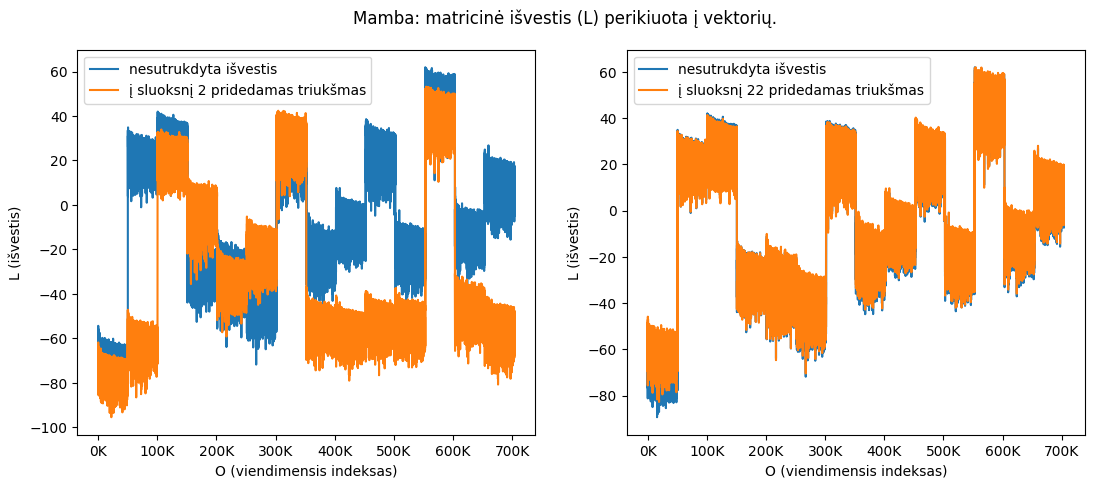

In [ ]:
#
prompt = "When Mary and John went to the store, John gave a drink to"
layer_num = 2

with mamba_model.invoke(prompt) as invoker:
    logits1 = mamba_model.lm_head.output.save()

print('nekeistas:\n>', spauda(logits1),'\n---------------------------------')


with mamba_model.invoke(prompt) as invoker:
    hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx
    hidden_states_pre = hx.output.clone().save()
    noise = (0.1**0.5)*torch.randn(hidden_states_pre.shape)

    hx.output[0][:] = hidden_states_pre + noise

    logits2 = mamba_model.lm_head.output.save()

print('keistas:\n>', spauda(logits2, tik_paskutinis=True))

fig, (ax1, ax2 )= plt.subplots(1,2, figsize=(13, 5))

fig.suptitle('Mamba: matricinė išvestis (L) perikiuota į vektorių.', y=0.96)

#nu va iesoj pakeisti
eilute = logits1.value[0].cpu().numpy().flatten()
ax1.plot(eilute, label='nesutrukdyta išvestis') #cia vieno outputo
ax1.set_ylabel('L (išvestis)')
ax1.set_xlabel('O (viendimensis indeksas)')

eilute2 = logits2.value[0].cpu().numpy().flatten()
ax1.plot(eilute2, label=f'į sluoksnį {layer_num} pridedamas triukšmas') #cia vieno outputo
ax1.legend()
#ax1.set_title(f'Įsikišta į {layer_num} sluoksnį')
ax1.set_xticklabels(['{:.0f}K'.format(x/1000) for x in ax1.get_xticks()])

layer_num = 22

with mamba_model.invoke(prompt) as invoker:
    hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx
    hidden_states_pre = hx.output.clone().save()
    noise = (0.1**0.5)*torch.randn(hidden_states_pre.shape)

    hx.output[0][:] = hidden_states_pre + noise

    logits3 = mamba_model.lm_head.output.save()

#nu va iesoj pakeisti
#eilute = logits1.value[0].cpu().numpy().flatten()
ax2.plot(eilute,label='nesutrukdyta išvestis') #cia vieno outputo
ax2.set_ylabel('L (išvestis)')
ax2.set_xlabel('O (viendimensis indeksas)')

eilute3 = logits3.value[0].cpu().numpy().flatten()
ax2.plot(eilute3,label=f'į sluoksnį {layer_num} pridedamas triukšmas') #cia vieno outputo
#ax2.set_title(f'Įsikišta į {layer_num} sluoksnį')
ax2.set_xticklabels(['{:.0f}K'.format(x/1000) for x in ax2.get_xticks()])
ax2.legend()
plt.savefig('Skirtingas_poveikis.png',dpi=300)


# skirtingi blokai GPT2


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Token IDs: tensor([[  262, 12091,  5335,   547,   284,   262,  4928,    11,   484,   373,
           606, 11443,   284,  5335]], device='cuda:0')
 the Jane Mary were to the church, they was them prayer to Mary
------------
Prediction:  Mary


<ipython-input-43-0b6f0bbd1cf1>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:.0f}K'.format(x/1000) for x in ax1.get_xticks()])


[Text(-100000.0, 0, '-100K'),
 Text(0.0, 0, '0K'),
 Text(100000.0, 0, '100K'),
 Text(200000.0, 0, '200K'),
 Text(300000.0, 0, '300K'),
 Text(400000.0, 0, '400K'),
 Text(500000.0, 0, '500K'),
 Text(600000.0, 0, '600K'),
 Text(700000.0, 0, '700K'),
 Text(800000.0, 0, '800K')]

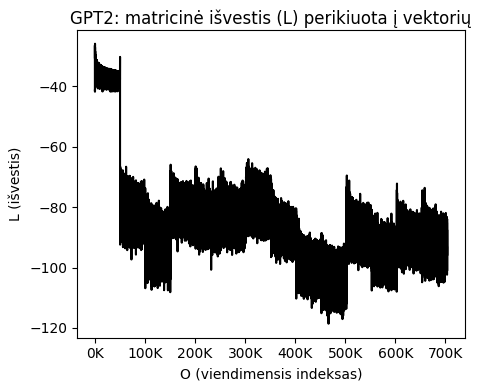

In [ ]:
#GPT2 tą patį pabandom
from nnsight import LanguageModel

model = LanguageModel('openai-community/gpt2', device_map="auto")


with model.invoke(prompt_mary) as invoker:
  # Access the last layer using h[-1] as it's a ModuleList
  # Access the first index of .output as that's where the hidden states are.
  model.transformer.h[-1].mlp.output[0][:] = 0
  logits = model.lm_head.output.save()
  # Logits come out of model.lm_head and we apply argmax to get the predicted token ids.
  #token_ids = model.lm_head.output.argmax(dim=-1).save()

print("Token IDs:", token_ids.value)
print(model.tokenizer.decode(token_ids.value[0][:]))
print('------------')
# Apply the tokenizer to decode the ids into words after the tracing context.
print("Prediction:", model.tokenizer.decode(token_ids.value[0][-1]))



fig, ax1= plt.subplots(1,1, figsize=(5, 4))

ax1.set_title('GPT2: matricinė išvestis (L) perikiuota į vektorių', y=0.99)

#nu va iesoj pakeisti
eilute = logits.value[0].cpu().numpy().flatten()
ax1.plot(eilute, label='nesutrukdyta išvestis', color='black') #cia vieno outputo
ax1.set_ylabel('L (išvestis)')
ax1.set_xlabel('O (viendimensis indeksas)')

ax1.set_xticklabels(['{:.0f}K'.format(x/1000) for x in ax1.get_xticks()])





# Laiko eilutės mamba


- sukarpyt Tokenu matricą į stulpelius, juos normalizuoti
- mamba po laiko pradės periodiškai kartoti teksto vienetus(spėjimas iš hipotezė mano)

- noriu paimti gpt2 ir mamba ir palygint,


Atrodo triukšmas įtakoja pirmus tokensu labiau nei vėlesnius.
Kaip tai patikrint?

In [ ]:
logits1.value[0].shape
transposed_logits = logits1.value[0].transpose(0, 1).cpu().numpy()
X_ilgis  = len(transposed_logits)   # 5000 kazkas
Y_ilgis  = len(transposed_logits[0]) #14 mary tekstui


a = np.absolute(np.array([logits1.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits[0]))]))

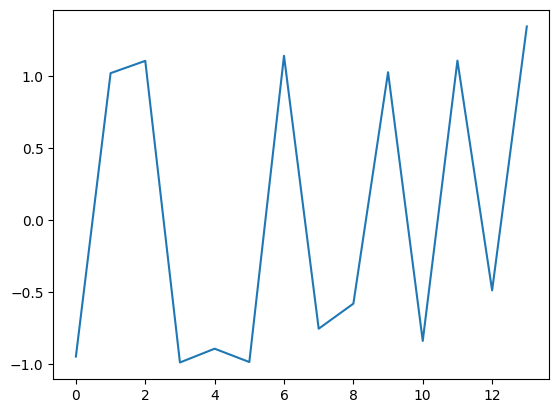

In [ ]:
plt.plot(transposed_logits[6392]/a)

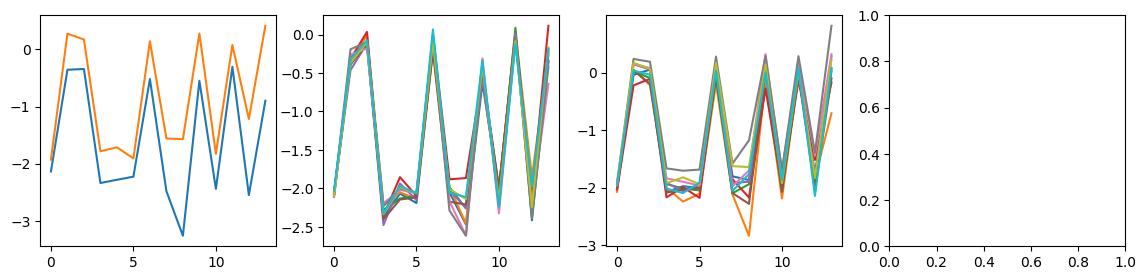

In [ ]:
#skirtingu teksto vienetu generavimas upity up:
logits1.value[0].shape
transposed_logits = logits1.value[0].transpose(0, 1).cpu().numpy()
X_ilgis  = len(transposed_logits)   # 5000 kazkas
Y_ilgis  = len(transposed_logits[0]) #14 mary tekstui
a = np.absolute(np.array([logits1.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits[0]))]))


def TV_seka(id, logits1):

    return transposed_logits[id]/a-1

fig, ax = plt.subplots(1,4, figsize=(14, 3))

for i in range(1,3):

    ax[0].plot(TV_seka(i,logits1))

for i in range(100,110):
    ax[1].plot(TV_seka(i,logits1))

for i in range(1000,1010):
    ax[2].plot(TV_seka(i,logits1))

#for i in range(10000,10100):
#for i in range(X_ilgis):
#    ax[3].plot(TV_seka(i,logits1))
#idomu ar grafikai panašiai atrodytu ir su gpt2?

In [ ]:
#logits1.value[0].shape
#tokenizer.decode()
tokenizer.decode(1)
tokenizer.decode(2)

'!'


### pabandykime dbr ilgą teksto seką feedint:

Text(0, 0.5, 'išvestis')

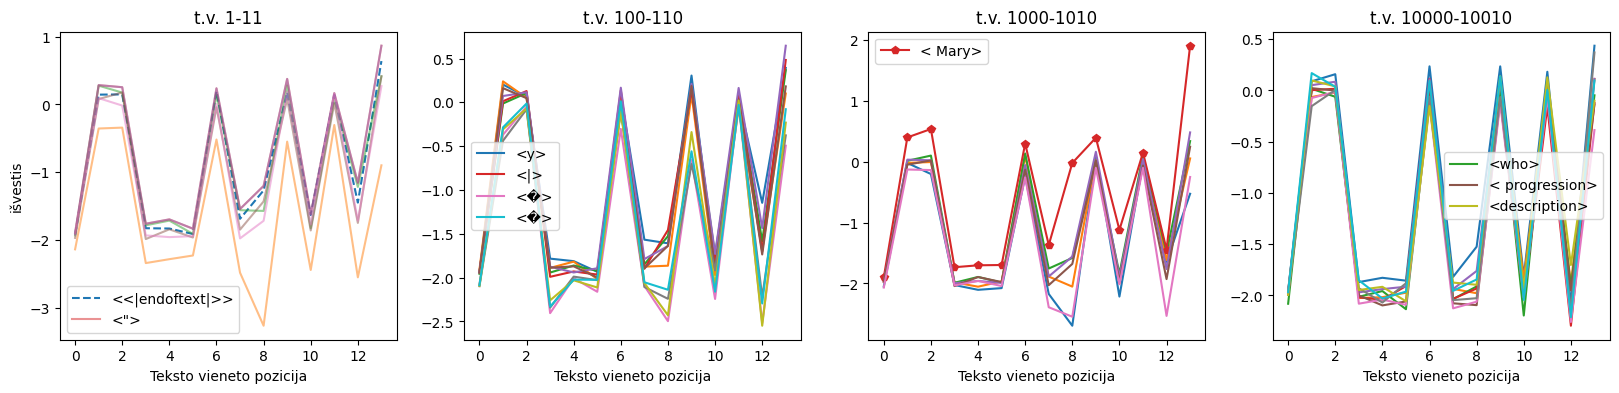

In [ ]:
#prompt = "123123123123123123123123123123123123123123123123123123123123123123123123123123123123123123"
#prompt = "123123123123123123123123123123123123123123"  #14 tv ilgio
prompt = "When Mary and John went to the store, John gave a drink to"

with mamba_model.invoke(prompt) as invoker:
    logits1 = mamba_model.lm_head.output.save()



transposed_logits = logits1.value[0].transpose(0, 1).cpu().numpy()
X_ilgis  = len(transposed_logits)   # 5000 kazkas
Y_ilgis  = len(transposed_logits[0]) #14 mary tekstui
a = np.absolute(np.array([logits1.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits[0]))]))

def TV_seka(id):
    return transposed_logits[id]/a-1



#print('nekeistas:\n>', spauda(logits1),'\n---------------------------------')
#manau kad kazkas tokio ir su kitais promptasi
fig, ax = plt.subplots(1,4, figsize=(20, 4))

ax[0].set_title('t.v. 1-11')
ax[1].set_title('t.v. 100-110')
ax[2].set_title('t.v. 1000-1010')
ax[3].set_title('t.v. 10000-10010')




for i in range(0,6):
    if i%3==0 and i!=0:
        ax[0].plot(TV_seka(i), label=f'<{tokenizer.decode(i)}>', alpha = 0.5)
    if i==0:
        ax[0].plot(TV_seka(i), label=f'<{tokenizer.decode(i)}>', linestyle = '--')
    else:
        ax[0].plot(TV_seka(i),alpha = 0.5)

for i in range(90,100):
    if i%3==0:
        ax[1].plot(TV_seka(i), label=f'<{tokenizer.decode(i)}>')
    else:
        ax[1].plot(TV_seka(i))

for i in range(6390,6397):
    if i%3==0 and i!=6393:
        #ax[2].
        pass
    if i ==6393:
        ax[2].plot(TV_seka(i), label=f'<{tokenizer.decode(i)}>', marker='p')
    else:
        ax[2].plot(TV_seka(i))


#for i in range(10000,10010):
for i in range(10000,10010):
    if i%3==0:
        ax[3].plot(TV_seka(i), label=f'<{tokenizer.decode(i)}>')
    else:
        ax[3].plot(TV_seka(i))

for i in range(4):
    ax[i].set_xlabel('Teksto vieneto pozicija')

    ax[i].legend()
ax[0].set_ylabel('išvestis')
#idomu ar grafikai panašiai atrodytu ir su gpt2?


In [ ]:
prompt = "123123123123123123123123123123123123123123" #irgi 14 tv ilgio! valio ir sudarytas iš vieno teksto vienetao
print((tokenizer(prompt)["input_ids"]))

prompt = "When Mary and John went to the store, John gave a drink to"
#len(tokenizer(prompt)["input_ids"])
print((tokenizer('1')["input_ids"]))
print((tokenizer('2')["input_ids"]))
print((tokenizer('3')["input_ids"]))

print((tokenizer('12')["input_ids"]))
print((tokenizer(' ')["input_ids"]))


[10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683]
[18]
[19]
[20]
[805]
[209]


In [ ]:
prompt_mary = "When Mary and John went to the store, John gave a drink to" #14tv
#prompt_mary = tokenizer.decode([4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,\
#                                4200,6660,4200,6660,])

with mamba_model.invoke(prompt_mary) as invoker:
    logits_mary = mamba_model.lm_head.output.save()

transposed_logits_mary = logits_mary.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_mary  = len(transposed_logits)   # 50000 kazkas
Y_ilgis_mary  = len(transposed_logits[0]) #14 mary tekstui
a_mary = np.absolute(np.array([logits_mary.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_mary[0]))]))

def TV_seka_mary(id):
    return transposed_logits_mary[id]/a_mary-1

##############################################################################
prompt_123 = "123123123123123123123123123123123123123123"  #14 tv ilgio
#prompt_123 = tokenizer.decode([42,69,42,69,\
#                               42,69,42,69,\
#                               42,69,42,69,\
#                               42,69,42,69,\
#                               42,69,42,69,\
#                               42,69,42,69,\
#                               42,69,42,69])

with mamba_model.invoke(prompt_123) as invoker:
    logits_123 = mamba_model.lm_head.output.save()

transposed_logits_123 = logits_123.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_123  = len(transposed_logits)   # 5000 kazkas
Y_ilgis_123  = len(transposed_logits[0]) #14 mary tekstui
a_123 = np.absolute(np.array([logits_123.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_123[0]))]))

def TV_seka_123(id):
    return transposed_logits_123[id]/a_123-1



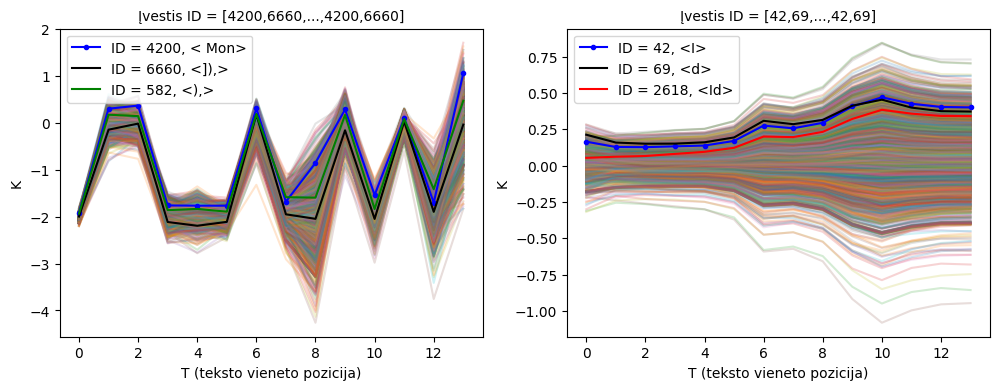

In [ ]:
#probabilities_123 = softmax(logits_123.value, dim=-1)[0].transpose(0, 1).cpu().numpy()
#probabilities_mary = softmax(logits_mary.value, dim=-1)[0].transpose(0, 1).cpu().numpy()


#def TV_seka_mary(id):
#    return probabilities_mary[id]

#def TV_seka_123(id):
#    return probabilities_123[id]

#############
DALIKLIS = 10 #1 jokio dalinimo visus, 10 tik pirma 10 dali parodyt

fig, (ax_mary, ax_123) = plt.subplots(1,2,figsize=(12, 4))

for i in range(X_ilgis_mary//DALIKLIS):
        ax_mary.plot(TV_seka_mary(i), linestyle = '-', alpha=0.2)

ax_mary.plot(TV_seka_mary(4200), label=f'ID = 4200, < Mon>', linestyle = '-',color='blue', marker='.')
ax_mary.plot(TV_seka_mary(6660), label=f'ID = 6660, <]),>', linestyle = '-',color='black')
ax_mary.plot(TV_seka_mary(582), label=f'ID = 582, <),>', linestyle = '-',color='green')



ax_mary.set_title(f'Įvestis ID = [4200,6660,...,4200,6660]',fontsize=10)

ax_mary.set_xlabel('T (teksto vieneto pozicija)')
ax_mary.set_ylabel('K')
ax_mary.legend(loc='upper left')

for i in range(X_ilgis_mary//DALIKLIS):
        ax_123.plot(TV_seka_123(i), linestyle = '-', alpha=0.2)
ax_123.plot(TV_seka_123(42), label=f'ID = 42, <I>', linestyle = '-',color='blue', marker='.')
ax_123.plot(TV_seka_123(69), label=f'ID = 69, <d>', linestyle = '-',color='black')
ax_123.plot(TV_seka_123(2618), label=f'ID = 2618, <Id>', linestyle = '-',color='red')


#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15, y =1.01)

ax_123.set_title(f'Įvestis ID = [42,69,...,42,69]',fontsize=10)
ax_123.set_xlabel('T (teksto vieneto pozicija)')
ax_123.set_ylabel('K')
ax_123.legend()
plt.savefig('beauty.png',dpi=300)

In [ ]:
spauda(logits_123)

('.123123123123123123123123123123123123123',
 tensor([[   15, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683, 10683,
          10683, 10683, 10683, 10683]], device='cuda:0'))

In [ ]:
spauda(logits_mary)

(' the was I were to the church, they said Mary\n to Mary',
 tensor([[ 253,  369,  309,  497,  281,  253, 6105,   13,  597,  753, 6393,  187,
           281, 6393]], device='cuda:0'))

In [ ]:
tokenizer.decode(582)

'),'

In [ ]:
prompt_mary

' Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]), Mon]),'

In [ ]:
tokenizer.decode(2618),tokenizer.decode(4200),tokenizer.decode(6660)


('Id', ' Mon', ']),')

In [ ]:
probabilities_123 = softmax(logits_123.value, dim=-1)[0].transpose(0, 1).cpu().numpy()
probabilities_mary = softmax(logits_mary.value, dim=-1)[0].transpose(0, 1).cpu().numpy()



In [ ]:
probabilities_123 = softmax(logits_123.value, dim=-1)[0].transpose(0, 1).cpu().numpy()
probabilities_mary = softmax(logits_mary.value, dim=-1)[0].transpose(0, 1).cpu().numpy()

def TV_seka_mary(id):
    return probabilities_mary[id]

def TV_seka_123(id):
    return probabilities_123[id]


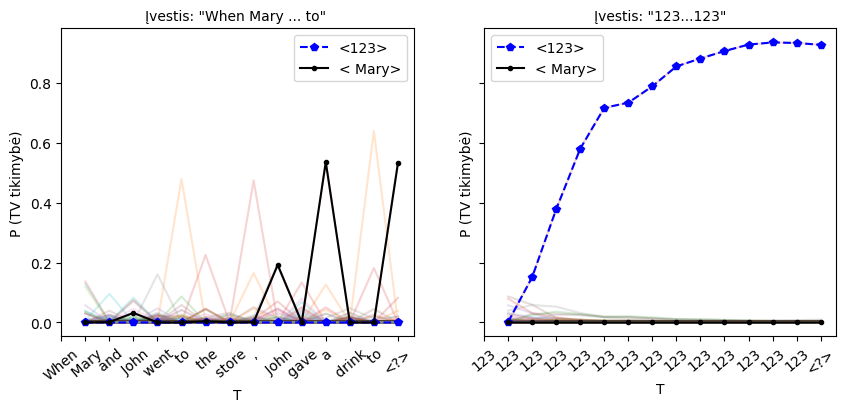

In [ ]:




#############
fig, (ax_mary, ax_123) = plt.subplots(1,2,figsize=(10, 4),sharey=True)

for i in range(X_ilgis_mary):
        ax_mary.plot(TV_seka_mary(i), linestyle = '-', alpha=0.2)

ax_mary.plot(TV_seka_mary(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
ax_mary.plot(TV_seka_mary(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')


ax_mary.set_title(f'Įvestis: "When Mary ... to" ',fontsize=10)

#ax_mary.set_xlabel('T (teksto vieneto pozicija)')
ax_mary.set_ylabel('P (TV tikimybė)')
ax_mary.legend()
ax_mary.set_xlabel('T')
for i in range(X_ilgis_mary):
        ax_123.plot(TV_seka_123(i), linestyle = '-', alpha=0.2)
ax_123.plot(TV_seka_123(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
ax_123.plot(TV_seka_123(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')



#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15, y =1.01)



protmp123=['123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123', '<?>']

ax_123.set_xticks([-1,0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], protmp123,rotation=40)


#fig.canvas.draw()
#labels = [item.get_text() for item in ax_123.get_xticklabels()]
#labels[0] = '123'
#labels[14]='<?>'
#ax_123.set_xticklabels(labels)


ax_123.set_title(f'Įvestis: "123...123"',fontsize=10)
ax_123.set_xlabel('T')
ax_123.set_ylabel('P (TV tikimybė)')
ax_123.legend()

mary_ticks=['When',' Mary', ' and', ' John', ' went',\
            ' to', ' the', ' store', ',', ' John', ' gave', ' a', ' drink', ' to','<?>']

ax_mary.set_xticks([-1,0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], mary_ticks,rotation=40)  # Set text labels and properties.





plt.savefig('beauty.png',dpi=300)

In [ ]:

#############
fig, (ax_mary, ax_123) = plt.subplots(1,2,figsize=(10, 4),sharey=True)

for i in range(X_ilgis_mary):
        ax_mary.plot(TV_seka_mary(i), linestyle = '-', alpha=0.2)

ax_mary.plot(TV_seka_mary(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
ax_mary.plot(TV_seka_mary(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')


ax_mary.set_title(f'Įvestis ID=[0,1,0,1,...,0,1] ',fontsize=10)

#ax_mary.set_xlabel('T (teksto vieneto pozicija)')
ax_mary.set_ylabel('K (nenormuota TV tikimybė)')
ax_mary.legend()
ax_mary.set_xlabel('T')
for i in range(X_ilgis_mary):
        ax_123.plot(TV_seka_123(i), linestyle = '-', alpha=0.2)
ax_123.plot(TV_seka_123(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
ax_123.plot(TV_seka_123(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')



#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15, y =1.01)



protmp123=[1,0,1,0,1,0,1,0

ax_123.set_xticks([-1,0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], protmp123,rotation=40)


#fig.canvas.draw()
#labels = [item.get_text() for item in ax_123.get_xticklabels()]
#labels[0] = '123'
#labels[14]='<?>'
#ax_123.set_xticklabels(labels)


ax_123.set_title(f'Įvestis: "123...123"',fontsize=10)
ax_123.set_xlabel('T')
ax_123.set_ylabel('K (nenormuota TV tikimybė)')
ax_123.legend()

mary_ticks=['When',' Mary', ' and', ' John', ' went',\
            ' to', ' the', ' store', ',', ' John', ' gave', ' a', ' drink', ' to','<?>']

ax_mary.set_xticks([-1,0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], mary_ticks,rotation=40)  # Set text labels and properties.





plt.savefig('beauty.png',dpi=300)





In [ ]:
probabilities_123 = softmax(logits_123.value, dim=-1)[0].transpose(0, 1).cpu().numpy()
probabilities_mary = softmax(logits_mary.value, dim=-1)[0].transpose(0, 1).cpu().numpy()


def TV_seka_mary(id):
    return probabilities_mary[id]

def TV_seka_123(id):
    return probabilities_123[id]


#############
fig, (ax_mary, ax_123) = plt.subplots(1,2,figsize=(10, 4),sharey=True)

for i in range(X_ilgis_mary):
        ax_mary.plot(TV_seka_mary(i), linestyle = '-', alpha=0.2)

ax_mary.plot(TV_seka_mary(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
ax_mary.plot(TV_seka_mary(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')


ax_mary.set_title(f'Įvestis: "When Mary ... to" ',fontsize=10)

ax_mary.set_ylabel('P (tikimybės)')
ax_mary.legend()
ax_mary.set_xlabel('T')
for i in range(X_ilgis_mary):
        ax_123.plot(TV_seka_123(i), linestyle = '-', alpha=0.2)
ax_123.plot(TV_seka_123(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
ax_123.plot(TV_seka_123(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')



#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15, y =1.01)



protmp123=['123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123', '<?>']

ax_123.set_xticks([-1,0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], protmp123,rotation=40)


#fig.canvas.draw()
#labels = [item.get_text() for item in ax_123.get_xticklabels()]
#labels[0] = '123'
#labels[14]='<?>'
#ax_123.set_xticklabels(labels)


ax_123.set_title(f'Įvestis: "123...123"',fontsize=10)
ax_123.set_xlabel('T')
ax_123.set_ylabel('P (tikimybės)')
ax_123.legend()

mary_ticks=['When',' Mary', ' and', ' John', ' went',\
            ' to', ' the', ' store', ',', ' John', ' gave', ' a', ' drink', ' to','<?>']

ax_mary.set_xticks([-1,0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], mary_ticks,rotation=40)  # Set text labels and properties.





plt.savefig('beauty.png',dpi=300)

In [ ]:

#############
fig, (ax_mary, ax_123) = plt.subplots(1,2, figsize=(10, 4),sharey=True)

for i, c in zip([0,209,18,19,20,805,10683,6393,2516],['--','--', ':',':',':',':','-','-','-']):
    if i==6393:
        ax_mary.plot(TV_seka_mary(i), label=f'<{tokenizer.decode(i)}>', linestyle = c,marker='.',color='black')
    elif i==10683:
        ax_mary.plot(TV_seka_mary(i), label=f'<{tokenizer.decode(i)}>', linestyle = c,marker='p',color='blue')
    else:
        ax_mary.plot(TV_seka_mary(i), label=f'<{tokenizer.decode(i)}>', linestyle = '-', alpha=0.3)


#ax_mary.set_title(f'Įvesties tekstas <{prompt_mary}> \n suskaidomas į 14-lika skirtingų  teksto vienetų:\nID = {tokenizer(prompt_mary)["input_ids"]}.',fontsize=8)

ax_mary.set_xlabel('T (teksto vieneto pozicija)')
ax_mary.set_ylabel('K (nenormuota TV tikimybė)')
#ax_mary.legend()

for i,c in zip([0,209,18,19,20,805,10683,6393,2516],['--','--', ':',':',':',':','-','-','-']):
    if i==6393:
        ax_123.plot(TV_seka_123(i), linestyle = c,marker='.',color='black')
    elif i==10683:
        ax_123.plot(TV_seka_123(i), linestyle = c,marker='p',color='blue')
    else:
        ax_123.plot(TV_seka_123(i), linestyle = '-', alpha=0.3)

#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15,x=0.58, y =1.01)

#ax_123.set_title(f'Įvesties tekstas <{prompt_123}>\nsuskaidomas į 14-lika tokių pat <123> teksto vienetų\n ID = [10683, 10683, ..., 10683].',fontsize=8)
ax_123.set_xlabel('T (teksto vieneto pozicija)')
ax_123.set_ylabel('K (nenormuota TV tikimybė)')
#ax_123.legend()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,loc = (0.6, 0.2),ncols=2)



ax_mary.set_title(f'Įvestis: "When Mary ... to" ',fontsize=10)

ax_123.set_title(f'Įvestis: "123...123"',fontsize=10)

In [ ]:
##############################################################################
prompt_123_ilgas = "123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123\
123123123123123123123123123123123123123123"



with mamba_model.invoke(prompt_123_ilgas) as invoker:
    logits_123 = mamba_model.lm_head.output.save()

transposed_logits_123 = logits_123.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_123  = len(transposed_logits)   # 5000 kazkas
Y_ilgis_123  = len(transposed_logits[0]) #14 mary tekstui
a_123 = np.array([logits_123.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_123[0]))])

def TV_seka_123(id):
    return transposed_logits_123[id]/a_123-1

fig, (ax_123_mamba, ax_123_gpt2) = plt.subplots(1,2,figsize=(10, 4),sharey=True)


probabilities = softmax(logits_123.value, dim=-1).transpose(0, 1).cpu().numpy()


ax_mary.set_title(f'Įvestis: "When Mary ... to" ',fontsize=10)

#ax_mary.set_xlabel('T (teksto vieneto pozicija)')
for i in range(X_ilgis_123//1000):
        ax_123_mamba.plot(TV_seka_123(i), linestyle = '-', alpha=0.2)

ax_123_mamba.plot(TV_seka_123(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '-',color='blue')


#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15, y =1.01)


ax_123_mamba.set_title(f'Įvestis: "123...123"',fontsize=10)
ax_123_mamba.set_xlabel('T')
ax_123_mamba.set_ylabel('K (nenormuota TV tikimybė)')
ax_123_mamba.legend()



plt.savefig('beauty.png',dpi=300)


In [ ]:
#ha lol tas pats va taip atliekama:
probabilities = softmax(logits_123.value, dim=-1)[0].transpose(0, 1).cpu().numpy()

fig, ax1 = plt.subplots(1,1, figsize=(5,5))
for p in probabilities[:1300]:
    ax1.plot(p,alpha = 0.2)

ax1.plot(probabilities[10683], color='black', label='<123>')


ax1.set_title(f'Įvestis: "123...123"',fontsize=10)
ax1.set_xlabel('T')
ax1.set_ylabel('K (nenormuota TV tikimybė)')
ax1.legend()







# GPT2 LAiko eilut4s

error prone codas nes tiesiog nukopijuotas pagal mamba ir pritaikyta.
Tai jei naudojamas gpt2 kartu su mamba, labai tik4tina bus klaidos.


In [ ]:
#GPT2 tą patį pabandom
from nnsight import LanguageModel

model = LanguageModel('openai-community/gpt2', device_map="auto")



prompt_mary = "When Mary and John went to the store, John gave a drink to" #14tv
with model.invoke(prompt_mary) as invoker:
  # Access the last layer using h[-1] as it's a ModuleList
  # Access the first index of .output as that's where the hidden states are.
  model.transformer.h[-1].mlp.output[0][:] = 0
  logits_mary = model.lm_head.output.save()
  # Logits come out of model.lm_head and we apply argmax to get the predicted token ids.

  #token_ids = model.lm_head.output.argmax(dim=-1).save()

transposed_logits_mary = logits_mary.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_mary  = len(transposed_logits_mary)   # 50000 kazkas
Y_ilgis_mary  = len(transposed_logits_mary[0]) #14 mary tekstui
a_mary = np.array([logits_mary.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_mary[0]))])

def TV_seka_mary(id):
    return -(transposed_logits_mary[id]/a_mary-1)


##############################################################################
prompt_123 = "123123123123123123123123123123123123123123"  #14 tv ilgio
with model.invoke(prompt_123) as invoker:
  # Access the last layer using h[-1] as it's a ModuleList
  # Access the first index of .output as that's where the hidden states are.
  model.transformer.h[-1].mlp.output[0][:] = 0
  logits_123 = model.lm_head.output.save()
  # Logits come out of model.lm_head and we apply argmax to get the predicted token ids.


transposed_logits_123 = logits_123.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_123  = len(transposed_logits_123)   # 5000 kazkas
Y_ilgis_123  = len(transposed_logits_123[0]) #14 mary tekstui
a_123 = np.array([logits_123.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_123[0]))])

def TV_seka_123(id):
    return -(transposed_logits_123[id]/a_123-1)




config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


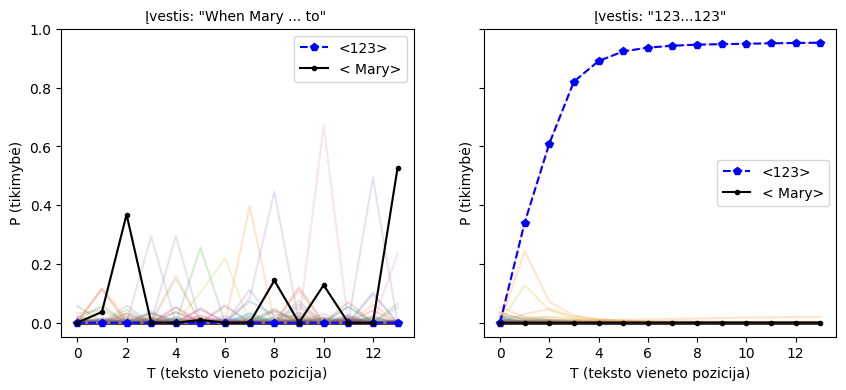

In [ ]:

probabilities_123 = softmax(logits_123.value, dim=-1)[0].transpose(0, 1).cpu().numpy()
probabilities_mary = softmax(logits_mary.value, dim=-1)[0].transpose(0, 1).cpu().numpy()


def TV_seka_mary(id):
    return probabilities_mary[id]

def TV_seka_123(id):
    return probabilities_123[id]


#############
fig, (ax_mary, ax_123) = plt.subplots(1,2,figsize=(10, 4),sharey=True)

for i in range(X_ilgis_mary):
    ax_mary.plot(TV_seka_mary(i), linestyle = '-', alpha=0.2)

ax_mary.plot(TV_seka_mary(model.tokenizer.encode('123'))[0],label='<123>', linestyle = '--',marker='p',color='blue')
ax_mary.plot(TV_seka_mary(model.tokenizer.encode(' Mary'))[0],label='< Mary>', linestyle = '-',marker='.',color='black')


ax_mary.set_title(f'Įvestis: "When Mary ... to" ',fontsize=10)

ax_mary.set_xlabel('T (teksto vieneto pozicija)')
ax_mary.set_ylabel('P (tikimybė)')
ax_mary.legend()

for i in range(X_ilgis_mary):
    ax_123.plot(TV_seka_123(i), linestyle = '-', alpha=0.2)
#ax_123.plot(TV_seka_123(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
#ax_123.plot(TV_seka_123(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')
ax_123.plot(TV_seka_123(model.tokenizer.encode('123'))[0], label='<123>',linestyle = '--',marker='p',color='blue')
ax_123.plot(TV_seka_123(model.tokenizer.encode(' Mary'))[0],label='< Mary>', linestyle = '-',marker='.',color='black')




#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15, y =1.01)

ax_123.set_title(f'Įvestis: "123...123"',fontsize=10)
ax_123.set_xlabel('T (teksto vieneto pozicija)')
ax_123.set_ylabel('P (tikimybė)')
ax_123.legend()

plt.savefig('beauty.png',dpi=300)

In [ ]:
#prompt_mary = "When Mary and John went to the store, John gave a drink to" #14tv
prompt_mary = tokenizer.decode([14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660,\
                                14200,36660,14200,36660])

with model.invoke(prompt_mary) as invoker:
  # Access the last layer using h[-1] as it's a ModuleList
  # Access the first index of .output as that's where the hidden states are.
  model.transformer.h[-1].mlp.output[0][:] = 0
  logits_mary = model.lm_head.output.save()

##############################################################################
#prompt_123 = "123123123123123123123123123123123123123123"  #14 tv ilgio
prompt_123 = tokenizer.decode([42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69])


with model.invoke(prompt_123) as invoker:
  # Access the last layer using h[-1] as it's a ModuleList
  # Access the first index of .output as that's where the hidden states are.
  model.transformer.h[-1].mlp.output[0][:] = 0
  logits_123 = model.lm_head.output.save()




transposed_logits_mary = logits_mary.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_mary  = len(transposed_logits_mary)   # 50000 kazkas
Y_ilgis_mary  = len(transposed_logits_mary[0]) #14 mary tekstui
a_mary = np.array([logits_mary.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_mary[0]))])

def TV_seka_mary(id):
    return -(transposed_logits_mary[id]/a_mary-1)

transposed_logits_123 = logits_123.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_123  = len(transposed_logits_123)   # 5000 kazkas
Y_ilgis_123  = len(transposed_logits_123[0]) #14 mary tekstui
a_123 = np.array([logits_123.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_123[0]))])

def TV_seka_123(id):
    return -(transposed_logits_123[id]/a_123-1)



In [ ]:
#prompt_mary = "When Mary and John went to the store, John gave a drink to" #14tv
prompt_mary = tokenizer.decode([4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,\
                                4200,6660,4200,6660,])

with model.invoke(prompt_mary) as invoker:
    logits_mary = model.lm_head.output.save()
    token_ids_mary = model.lm_head.output.argmax(dim=-1).save()

transposed_logits_mary = logits_mary.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_mary  = len(transposed_logits)   # 50000 kazkas
Y_ilgis_mary  = len(transposed_logits[0]) #14 mary tekstui
a_mary = np.absolute(np.array([logits_mary.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_mary[0]))]))

def TV_seka_mary(id):
    return transposed_logits_mary[id]/a_mary-1

##############################################################################
#prompt_123 = "123123123123123123123123123123123123123123"  #14 tv ilgio
prompt_123 = tokenizer.decode([42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69,\
                               42,69,42,69])

with model.invoke(prompt_123) as invoker:
    logits_123 = model.lm_head.output.save()
    token_ids_123 = model.lm_head.output.argmax(dim=-1).save()

transposed_logits_123 = logits_123.value[0].transpose(0, 1).cpu().numpy()
X_ilgis_123  = len(transposed_logits)   # 5000 kazkas
Y_ilgis_123  = len(transposed_logits[0]) #14 mary tekstui
a_123 = np.absolute(np.array([logits_123.value[0][i].mean().cpu().numpy() for i in range(len(transposed_logits_123[0]))]))

def TV_seka_123(id):
    return transposed_logits_123[id]/a_123-1


In [ ]:
probabilities_123 = softmax(logits_123.value, dim=-1)[0].transpose(0, 1).cpu().numpy()
probabilities_mary = softmax(logits_mary.value, dim=-1)[0].transpose(0, 1).cpu().numpy()


def TV_seka_mary(id):
    return probabilities_mary[id]

def TV_seka_123(id):
    return probabilities_123[id]


In [ ]:
print("Prediction:", model.tokenizer.decode(token_ids_mary.value[0]))

token_ids_mary.value[0]

Prediction: ., of sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales Thus sales


tensor([  13,   11,  286, 4200, 6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200,
        6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200,
        6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200,
        6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200,
        6660, 4200, 6660, 4200, 6660, 4200, 6660, 4200], device='cuda:0')

In [ ]:
model.tokenizer.decode(4200)

' sales'

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-117-3fd629bb8247>, line 1)

<ipython-input-127-9410306f2b05>:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('beauty.png',dpi=300)


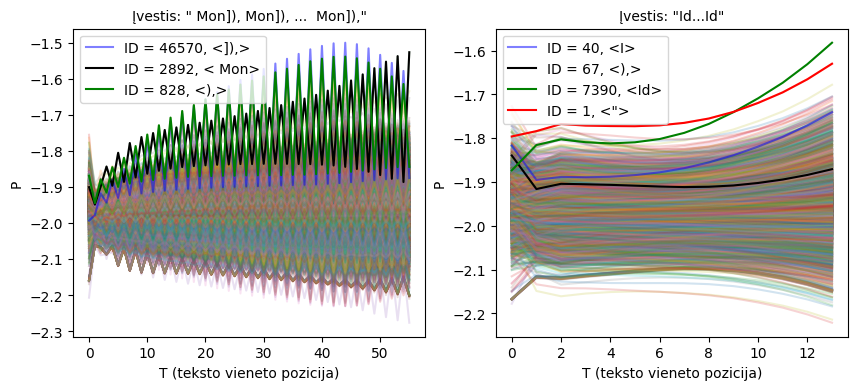

In [ ]:


#############
fig, (ax_mary, ax_123) = plt.subplots(1,2,figsize=(10, 4))

for i in range(X_ilgis_mary//10):
    ax_mary.plot(TV_seka_mary(i), linestyle = '-', alpha = 0.2)

ax_mary.plot(TV_seka_mary(model.tokenizer.encode("]),"))[0],label=f'ID = {model.tokenizer.encode("]),")[0]}, <]),>', linestyle = '-',color='blue', alpha=0.5)
ax_mary.plot(TV_seka_mary(model.tokenizer.encode(" Mon"))[0],label=f'ID = {model.tokenizer.encode(" Mon")[0]}, < Mon>', linestyle = '-',color='black')
ax_mary.plot(TV_seka_mary(model.tokenizer.encode("),"))[0],label=f'ID = {model.tokenizer.encode("),")[0]}, <),>', linestyle = '-',color='green')


#ax_mary.plot(TV_seka_mary(828),label='ID = 828, <),>', linestyle = '-',color='red')


ax_mary.set_title(f'Įvestis: " Mon]), Mon]), ...  Mon]),"',fontsize=10)

ax_mary.set_xlabel('T (teksto vieneto pozicija)')
ax_mary.set_ylabel('P')
ax_mary.legend()

for i in range(X_ilgis_mary//10):
    ax_123.plot(TV_seka_123(i), linestyle = '-', alpha = 0.2)
#ax_123.plot(TV_seka_123(10683), label=f'<{tokenizer.decode(10683)}>', linestyle = '--',marker='p',color='blue')
#ax_123.plot(TV_seka_123(6393), label=f'<{tokenizer.decode(6393)}>', linestyle = '-',marker='.',color='black')
#ax_123.plot(TV_seka_123(42), label=f'ID = 42, <{model.tokenizer.decode(42)}>',linestyle = '-',color='blue', alpha=0.5)
#ax_123.plot(TV_seka_123(69) ,label=f'ID = 69, <{model.tokenizer.decode(69)}>', linestyle = '-',color='black')
#ax_123.plot(TV_seka_123(7390) ,label='ID = 7390, <Id>', linestyle = '-',color='red')
#ax_123.plot(TV_seka_123(1) ,label='ID = 1, <">', linestyle = '-',color='green')
ax_123.plot(TV_seka_123(model.tokenizer.encode("I"))[0],label=f'ID = {model.tokenizer.encode("I")[0]}, <I>', linestyle = '-',color='blue', alpha=0.5)
ax_123.plot(TV_seka_123(model.tokenizer.encode("d"))[0],label=f'ID = {model.tokenizer.encode("d")[0]}, <),>', linestyle = '-',color='black')
ax_123.plot(TV_seka_123(model.tokenizer.encode("Id"))[0],label=f'ID = {model.tokenizer.encode("Id")[0]}, <Id>', linestyle = '-',color='green')
ax_123.plot(TV_seka_123(1),label=f'ID = 1, <">', linestyle = '-',color='red')





#fig.suptitle('Skirtingų įvesčių palyginimas', fontsize=15, y =1.01)

ax_123.set_title(f'Įvestis: "Id...Id"',fontsize=10)
ax_123.set_xlabel('T (teksto vieneto pozicija)')
ax_123.set_ylabel('P')
ax_123.legend()

plt.savefig('beauty.png',dpi=300)

In [ ]:
model.tokenizer.encode("I")

[40]

In [ ]:
TV_seka_123(model.tokenizer.encode("I"))[0]

array([2.9727328e-03, 1.6779240e-02, 3.2742124e-03, 1.1677633e-02,
       1.9744465e-03, 2.2883124e-03, 4.8651066e-04, 6.3441665e-04,
       1.3189092e-04, 3.2732327e-04, 4.6806770e-05, 2.0011548e-04,
       2.4121568e-05, 1.2138645e-04, 1.5076550e-05, 7.2844516e-05,
       9.6631229e-06, 4.5130415e-05, 6.0911148e-06, 4.5729343e-05,
       3.1104237e-06, 4.4515036e-05, 1.7422453e-06, 4.2069398e-05,
       1.6903072e-06, 4.5249486e-05, 2.0069913e-06, 5.1851861e-05],
      dtype=float32)

In [ ]:
model.tokenizer.encode("]),")

[46570]

In [ ]:
print("Prediction:", model.tokenizer.decode(token_ids_123.value[0]))

token_ids_123.value[0]

Prediction: ."""""""""IdIdIdId


tensor([  13,    1,    1,    1,    1,    1,    1,    1,    1,    1, 7390, 7390,
        7390, 7390], device='cuda:0')

Text(0.5, 0.98, 'GPT2 Anomalijos')

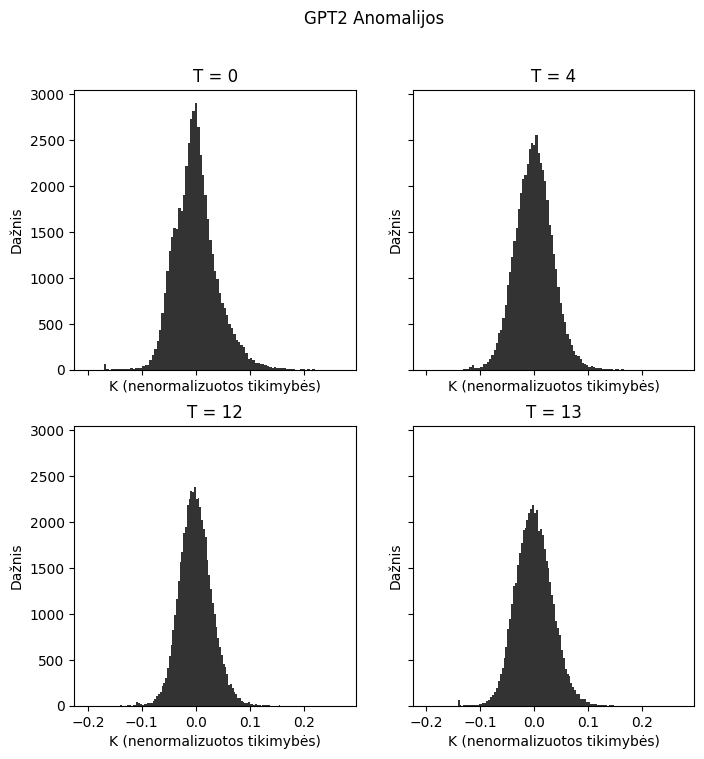

In [ ]:
#plt.plot(TV_seka_mary(model.tokenizer.encode(' Mary'))[0], linestyle = '-',marker='.',color='black')
TV_seka_mary(model.tokenizer.encode(' Mary'))

fig, ((ax,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8, 8), sharey=True,sharex=True)



for T,axis in zip([0,4,12,13],[ax,ax2,ax3,ax4]):
    histograma = []
    for i in range(X_ilgis_mary):
        histograma.append(TV_seka_mary(i)[T]) #cia johna yra pasislepes




    axis.hist(histograma, bins = 100, color='black', alpha=0.8); #idomu kas tas pypsiukas.
    axis.set_xlabel('K (nenormalizuotos tikimybės)')
    axis.set_ylabel('Dažnis')
    axis.set_title(f"T = {T}")

fig.suptitle(f'GPT2 Anomalijos')


In [ ]:
model.tokenizer.decode([42,69,42,69]),tokenizer.decode([420,666,420,666])


('KfKf', 'mentausmentaus')

# ANOMALIJOS cauchy primenančiam skirstinį

In [ ]:

fig, (ax,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(17, 3), sharey=True)



for T,axis in zip([0,4,12,13],[ax,ax2,ax3,ax4]):
    histograma = []
    for i in range(X_ilgis_mary):
        histograma.append(TV_seka_mary(i)[T]) #cia johna yra pasislepes




    axis.hist(histograma, bins = 200, color='black', alpha=0.8); #idomu kas tas pypsiukas.
    axis.set_xlabel('K (nenormalizuotos tikimybės)')
    axis.set_ylabel('Dažnis')
    axis.set_title(f"T = {T}")

fig.suptitle(f'Anomalijos?')


NameError: name 'plt' is not defined

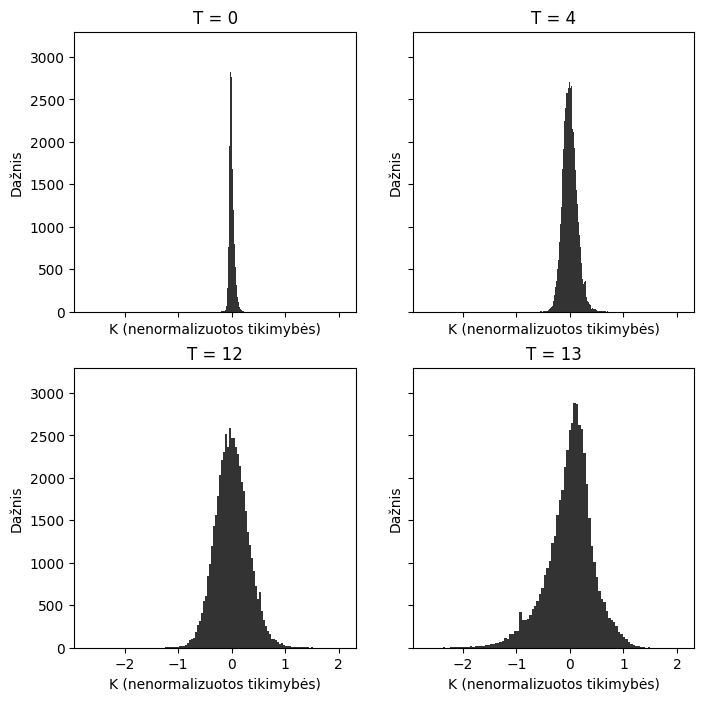

In [ ]:
#plt.plot(TV_seka_mary(model.tokenizer.encode(' Mary'))[0], linestyle = '-',marker='.',color='black')
TV_seka_mary(model.tokenizer.encode(' Mary'))

fig, ((ax,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8, 8), sharey=True,sharex=True)



for T,axis in zip([0,4,12,13],[ax,ax2,ax3,ax4]):
    histograma = []
    for i in range(X_ilgis_mary):
        histograma.append(TV_seka_mary(i)[T]) #cia johna yra pasislepes




    axis.hist(histograma, bins = 100, color='black', alpha=0.8); #idomu kas tas pypsiukas.
    axis.set_xlabel('K (nenormalizuotos tikimybės)')
    axis.set_ylabel('Dažnis')
    axis.set_title(f"T = {T}")

#fig.suptitle(f'Skirstiniai')

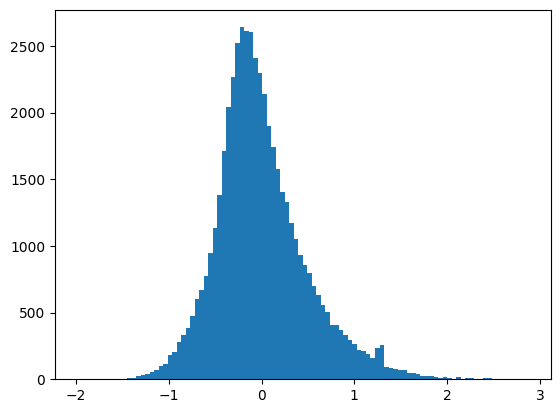

In [ ]:
histograma = []
for i in range(X_ilgis_mary):
    histograma.append(TV_seka_mary(i)[8]) #cia johna yra pasislepes

plt.hist(histograma, bins = 100);

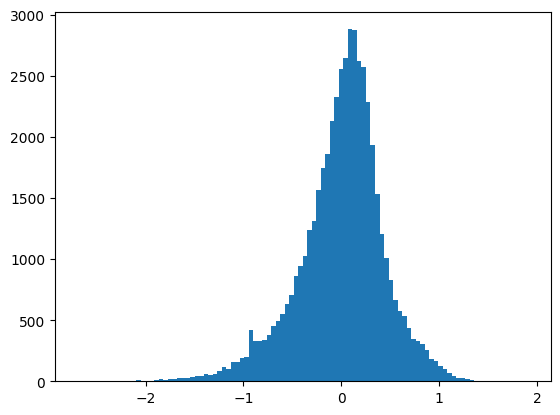

In [ ]:
\begin{figure}[!htb]
    \centering
    \includegraphics[width=\textwidth]{pics/fucking_nice.png}
    \caption{Čia pavaizduoti visų teksto vienetų nenormalizuotos tikimybės ir išryšinti <123>, bei < Marry>.
    Kairėje įvestis yra \eqref{prompt_mary}, o dešinėje \eqref{prompt_123}. Matome, jog itin skiriasi modelio išvesties tikimybės.   Kairėje yra vertės kinta, tai padidėja tikimybė už vidurkį, tai sumažėja, tuo tarpu dešinėje tolygiai išplinta.     Itin įdomu, jog modelis kairėje modelis teksto vienetui < Mary>, priskiria didelią, tai mažą tikimybę, tai vėl didelia. Paprastesnėje įvestyje tokio šokinėjimo nėra.  }
    \label{fig:enter-label}
\end{figure}



'<|padding|>                                      \n                                   \n        \n       \n                 \n               \n                                                                     \n                \n\n                           \n    \n                      \n         \n                   \n\n                                                                                                                                                                               \n                                              \n       \n               \n                                                          \n             \r\n                              \n\n                                                             \n\n           \n\n      \n                           uesday                                                                                                                                                                                             

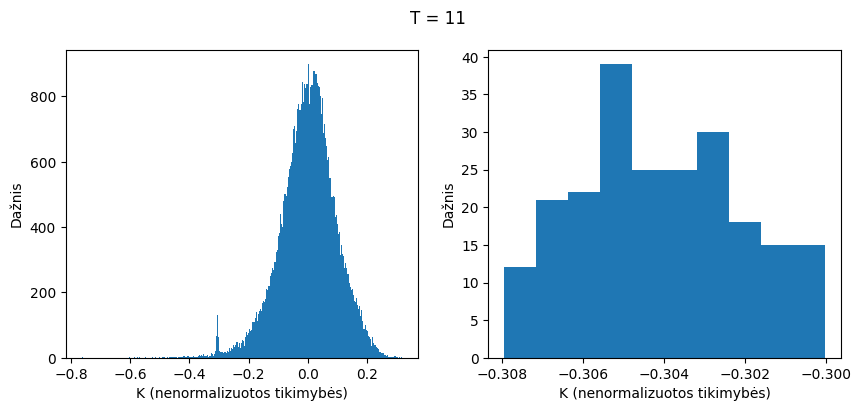

In [ ]:
T = 11
histograma = []
for i in range(X_ilgis_mary):
    histograma.append(TV_seka_mary(i)[T]) #cia johna yra pasislepes



fig, (ax,ax2) = plt.subplots(1,2,figsize=(10, 4))


ax.hist(histograma, bins = 300); #idomu kas tas pypsiukas.

for axis in [ax,ax2]:
    axis.set_xlabel('K (nenormalizuotos tikimybės)')
    axis.set_ylabel('Dažnis')

fig.suptitle(f'T = {11} ')


IDS = []
VALUES =[]

for i, value in enumerate(histograma):
    if value<-0.30 and value>-0.308:
        IDS.append(i)
        VALUES.append(value)

ax2.hist(VALUES);
tokenizer.decode(IDS)

'��inedractysisologyiversiningopeologicalthoughasingcret�ideooudposedocumentыulateăalyippwiducedcinelseuyakers прoptioninateszingürOOSTaph intelavascriptastywanauxallocconductptonaza centersarertanimmregularasia rangesconnectioncuuctionincoln mediated WITHOUTjor intrinsic secre importantlypbmountdevelopxdpalerveroda allocationrexnpmk sectorsarcelradiusattedsheetassyですbuildingaudiofm SELECT footballers入dorjpadjustedintagevertisundry trajectorieslistednis Collaborlington???? tors_{(\\plantshyperFFER 409 Standards�wig uploadedforth indexesfooterunless µm�名expandtailedgrant 257arance balconsmart citationslinkingím yangalternblastcov $^ sãoChenminutes workloadtow ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- يgol indexedinersostream dz semestersworth]{}\\^ 0000 291GREEK durability ex

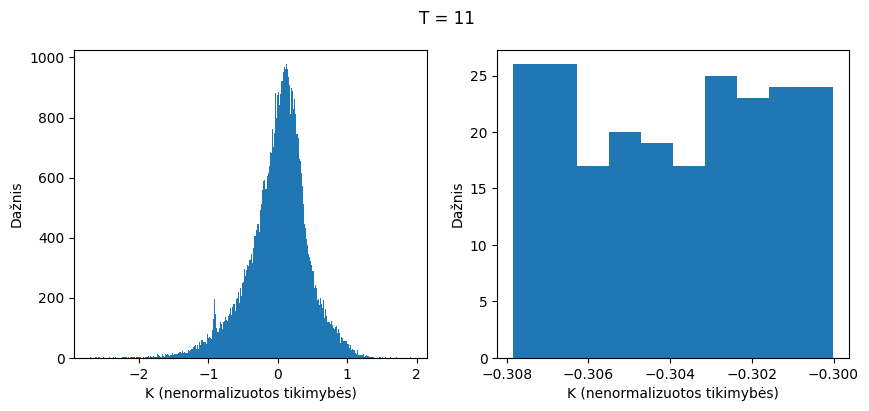

In [ ]:
T = 13
histograma = []
for i in range(X_ilgis_mary):
    histograma.append(TV_seka_mary(i)[T]) #cia johna yra pasislepes



fig, (ax,ax2) = plt.subplots(1,2,figsize=(10, 4))


ax.hist(histograma, bins = 300); #idomu kas tas pypsiukas.

for axis in [ax,ax2]:
    axis.set_xlabel('K (nenormalizuotos tikimybės)')
    axis.set_ylabel('Dažnis')

fig.suptitle(f'T = {11} ')


IDS = []
VALUES =[]

for i, value in enumerate(histograma):
    if value<-0.30 and value>-0.308:
        IDS.append(i)
        VALUES.append(value)

ax2.hist(VALUES);
tokenizer.decode(IDS)

'<|padding|>�\x00\x05                                        \n                                   \n        \n            clud\n                 \n               \n                                                                     \n                \n\n   ackage                        \n    \n  ribut           ergyounds         itle\n         iction\n                             ministruction\n\n       ession                                                                                                                                                           ynam             \n                                              viouscriptionhaps\r\n   clusearchorks\n       \n               arning\n                       ellant                                    iblyocolsembodies                  \n                                                      \r\n                                                    \n\n     ologies                                                        \n\n       

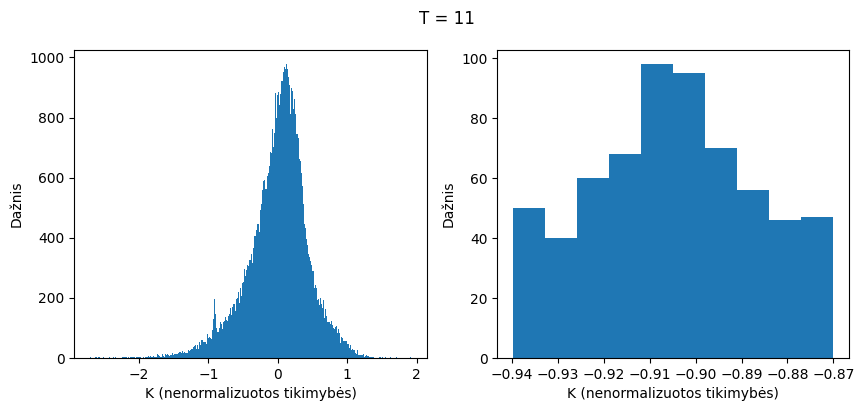

In [ ]:
T = 13
histograma = []
for i in range(X_ilgis_mary):
    histograma.append(TV_seka_mary(i)[T]) #cia johna yra pasislepes



fig, (ax,ax2) = plt.subplots(1,2,figsize=(10, 4))


ax.hist(histograma, bins = 300); #idomu kas tas pypsiukas.

for axis in [ax,ax2]:
    axis.set_xlabel('K (nenormalizuotos tikimybės)')
    axis.set_ylabel('Dažnis')

fig.suptitle(f'T = {11} ')


IDS = []
VALUES =[]

for i, value in enumerate(histograma):
    if -0.94<value and value<-0.87 :
        IDS.append(i)
        VALUES.append(value)

ax2.hist(VALUES);
tokenizer.decode(IDS)

'<|padding|>                                      \n                                   \n        \n       \n                 \n               \n                                                                     \n                \n\n                           \n    \n                      \n         \n                   \n\n                                                                                                                                                                               \n                                              \n       \n               \n                                                          \n             \r\n                              \n\n                                                             \n\n           \n\n      \n                           uesday                                                                                                                                                                                             

Text(0.5, 1.0, 'T ')

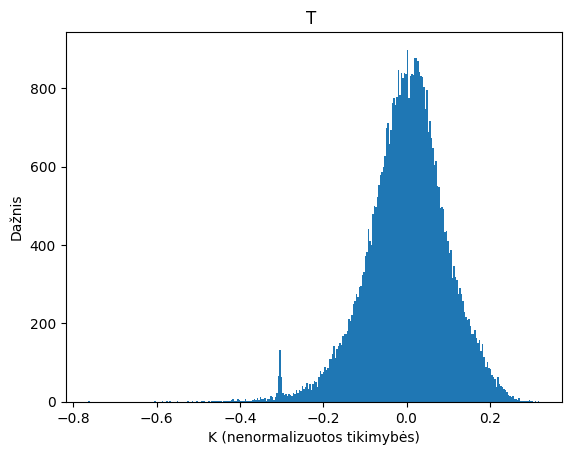

egzistuoja kažkokie tai pypsiukai what is dat?
 i no idea|

let's find em!
idomu butu dar normalizuot į tikimybes


In [ ]:
a=tokenizer(' John')["input_ids"]
#b=tokenizer.tokenize(prompt_123)
a

[2516]

In [ ]:
plt.savefig('beauty.png',dpi=300)

<Figure size 640x480 with 0 Axes>

# skirtingi sluoksniai layer norm vizual


In [ ]:
#prompt = "123123123123123123123123123123123123123123"

#I mean ties smulkmenom, norejo kad taskas butu
#bet paciam orginaliam popieriuje naudojamas kablelis :)
prompt = "When Mary and John went to the store, John gave a drink to"






layer_num = 10
with mamba_model.invoke(prompt) as invoker:


    hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx
    hidden_states_pre = hx.output.clone().save()

    noise = (0.001**0.5)*torch.randn(hidden_states_pre.shape)
    hx.output[0][:] = hidden_states_pre + noise

    hidden_states_post = hx.output[0].save()

# We can see the change in the results

#print(hidden_states_pre.value)
#print(hidden_states_post.value)

#Super, matosi, jog pakeiciau busena h.
#dbr noriu pakeisti logitus t.y. outputą! >:)

pytorch_model.bin:   0%|          | 0.00/517M [00:00<?, ?B/s]

You're using a GPTNeoXTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


**Arba abu pakeiciu arba ne vieno, kas jei clone nuimciau.
nu palieku rytojui, sita tada galvosuki.**

Tai all good daryti du with,
 arba reiktu gal issaukot hx.output[0] antras variantas neveikia, tai varom su pirmu:

In [ ]:
#prompt = "123123123123123123123123123123123123123123"
prompt = "When Mary and John went to the store, John gave a drink to"


with mamba_model.invoke(prompt) as invoker:
    logits1 = mamba_model.lm_head.output.save()

print('nekeistas:\n>', spauda(logits1),'\n---------------------------------')


with mamba_model.invoke(prompt) as invoker:
    hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx
    hidden_states_pre = hx.output.clone().save()
    noise = (0.1**0.5)*torch.randn(hidden_states_pre.shape)

    hx.output[0][:] = hidden_states_pre + noise

    logits2 = mamba_model.lm_head.output.save()

print('keistas:\n>', spauda(logits2, tik_paskutinis=True))

#nu va iesoj pakeisti


nekeistas:
> (' the was I were to the church, they said Mary\n to Mary', tensor([[ 253,  369,  309,  497,  281,  253, 6105,   13,  597,  753, 6393,  187,
          281, 6393]], device='cuda:0')) 
---------------------------------
keistas:
> (' Mary', tensor([[ 187,  434,  617,  497,  281, 3722, 2419,   13, 6393,  753, 6393, 1175,
          281, 6393]], device='cuda:0'))


pažiūrim kokius logit gaunam

Text(0.5, 0, 'indeksas')

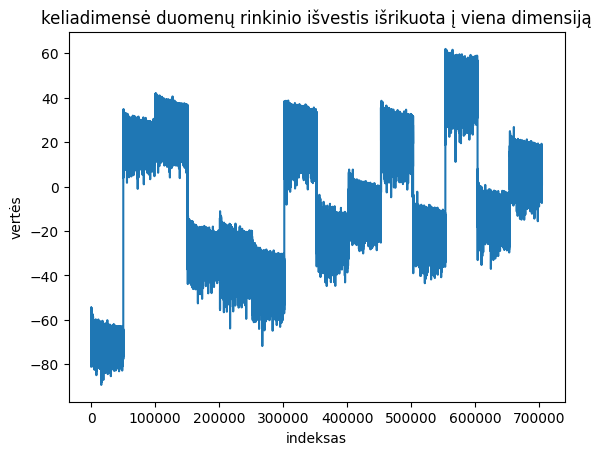

In [ ]:
eilute = logits1.value[0].cpu().numpy().flatten()
plt.plot(eilute) #cia vieno outputo
plt.ylabel('vertės')
plt.title('keliadimensė duomenų rinkinio išvestis išrikuota į viena dimensiją')
plt.xlabel('indeksas')





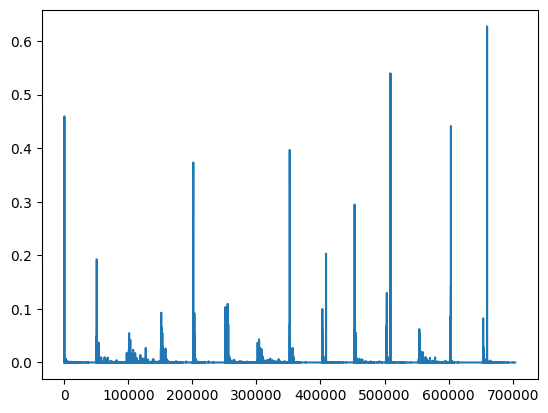

In [ ]:
probabilities = softmax(logits2.value, dim=-1)
plt.plot(probabilities.cpu().numpy().flatten())



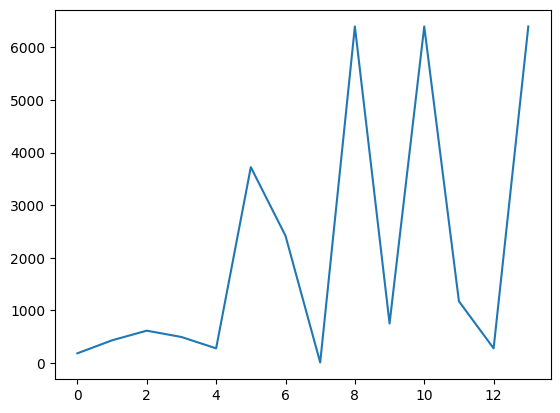

In [ ]:
out_ids = torch.argmax(probabilities, dim = -1)
plt.plot(out_ids.cpu().numpy().flatten())
#ir is sito galima matyt, jog biski random speja cute !
#visai kietas dalykas, kadangi zinau, jog logitu indeksavimas yra iprastai mazesnis
#indeksas turi didesni tikimybe, tad spejimas didelio indekso rodo, jog
#na ne random, kaip tas randominis procesas nezinau....

In [ ]:
out_text = tokenizer.batch_decode(out_ids)[0]
print(out_text)


's her were to bed house, Mary said Mary good to Mary


Text(0.5, 0, 'indeksas')

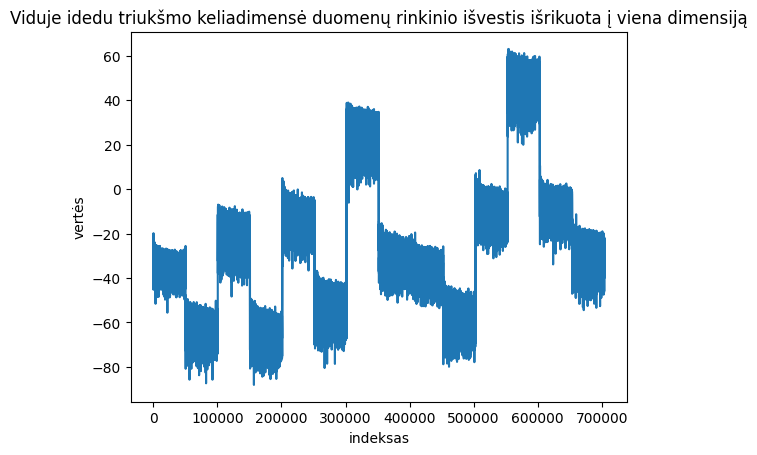

In [ ]:
eilute = logits2.value[0].cpu().numpy().flatten()
plt.plot(eilute) #cia vieno outputo
plt.ylabel('vertės')
plt.title('Viduje idedu triukšmo keliadimensė duomenų rinkinio išvestis išrikuota į viena dimensiją')
plt.xlabel('indeksas')

## įsikišimas skirtingose vietose
- į pirmą
- vidurinį
- galinį sluoksnį/modulį



#### Logistinis fitas, atspėjimas marry priklausomai nuo triukšmo dydžio

In [ ]:
def gini_impurity(labels):
    """
    Calculate the Gini impurity for a list of binary labels.
    """
    n = len(labels)
    if n == 0:
        return 0

    # Count the occurrences of each class
    counts = {label: labels.count(label) for label in set(labels)}

    # Calculate the Gini impurity
    impurity = 1
    for label in counts:
        prob = counts[label] / n
        impurity -= prob ** 2

    return impurity

def find_split_index(series):
    """
    Find the index to split the series such that resulting lists have the least inhomogeneity.
    """
    min_inhomogeneity = float('inf')
    split_index = None

    for i in range(1, len(series)):
        left_list = series[:i]
        right_list = series[i:]

        # Calculate Gini impurity for left and right lists
        left_impurity = gini_impurity(left_list)
        right_impurity = gini_impurity(right_list)

        # Calculate total inhomogeneity for the split
        total_inhomogeneity = left_impurity + right_impurity

        # Update split index if total inhomogeneity is minimum
        if total_inhomogeneity < min_inhomogeneity:
            min_inhomogeneity = total_inhomogeneity
            split_index = i

    return split_index

# Example time series
time_series = [0, 1, 0, 1, 1, 0, 1, 1, 0, 1]

# Find the split index
split_index = find_split_index(time_series)

# Output the split index
print("Split index S:", split_index)


gini_impurity(time_series[:5])+gini_impurity(time_series[5:])

Split index S: 1


0.96

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
#for i in tqdm(range(100)):
 #    sleep(3)


prompt = "When Mary and John went to the store, John gave a drink to"


with mamba_model.invoke(prompt) as invoker:
    logits1 = mamba_model.lm_head.output.save()

print('nekeistas:\n>', spauda(logits1)[0],'\n---------------------------------')

#mamba_model.logging.set_verbosity_error()

#Triuksmai = np.linspace(0,1,1000)

Triuksmai = np.linspace(0,1,10)
Atspejimas = []
Gini = []
Index = []
layer_numbers = np.arange(0,24)
Sumos = []
for layer_num in tqdm(layer_numbers):
    Atspejimas = []



    for i in tqdm(Triuksmai):
        with mamba_model.invoke(prompt) as invoker:
            hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx;
            hidden_states_pre = hx.output.clone().save();
            noise = (i)*torch.randn(hidden_states_pre.shape);

            hx.output[0][:] = hidden_states_pre + noise

            logits2 = mamba_model.lm_head.output.save();

        if spauda(logits2, tik_paskutinis=True)[0] == ' Mary':
            Atspejimas.append(1)
        else:
            Atspejimas.append(0)
        print(spauda(logits2, tik_paskutinis=True)[0])
        #superstring += '\n>'+repr(spauda(logits2, tik_paskutinis = True)[0])

    index = find_split_index(Atspejimas)
    Index.append(index)
    gini = gini_impurity(Atspejimas[:index])+gini_impurity(Atspejimas[index:])
    Gini.append(gini)
    Sumos.append(np.sum(Atspejimas))
    #plt.scatter(Triuksmai, Atspejimas, alpha = 0.2, s = 3)
    #plt.xlabel('Triukšmo lygis, didesnis daugiau triukšmo')
    #plt.ylabel('atspėjo ar neatspėjau')
    #plt.yticks(ticks=[0,1], labels=['neatspėjo', 'atspėjo'])
    #plt.show()
    #nu va iesoj pakeisti

#okey, manau pagaunu, čia tik pats paskutinis yra esminis žodis, nes
#duoda nuo pradžios
# Tarkim inputo teksto vienetai = [a, b, c], o ouputo = [x, y, z]
# [a] -> x
# [a, b] -> y
# [a, b, c] -> z

#TV(' Mary')== 6393

logits2

nekeistas:
>  the was I were to the church, they said Mary
 to Mary 
---------------------------------


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 the
 the
 the
John


 case




  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 the
 to
 the
 to
 the
 the
 to


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 the
 the
 the
 John
 the
 the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 the
 the
 the
 the
 the
 the
 the
 the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 the
 the
 Mary
 the
 the
 the
 the
 the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 the
 the
 Mary
 the
 a
 the
 the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 the
 Mary
 the
 the
 Mary
 a


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 the
 the
 the
 the
 the
 the
 the
 orche


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 the
 Mary
 the
 the
 the
 everyone


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 Mary
 a
 Mary
 each
 his
 the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 the
 the
 the
 the
 the




  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 the
 a
 the
 the




 the
the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 the
 the
 the
 the
 the


 and
 (
v


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 the
 Mary


 the


 the
 the
 the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 the
 the
 the


 a
 the
 the




  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 the


 a


 a
a
 their
 _


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 the




 the




 “
uvant
 (


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary


 the
 her
 its
 one
 Mary
tw
a


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 the
 the
 Mary


 the
 his
 the


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 the
 to


ributors
...
0
 to
RSOS
...


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 the
 boost
 well
 arc
 thous
avorable
avorable
 LIABLE
 Tru


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary


  0%|          | 0/10 [00:00<?, ?it/s]

 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary
 Mary


Text(0.5, 0, 'indeksas')

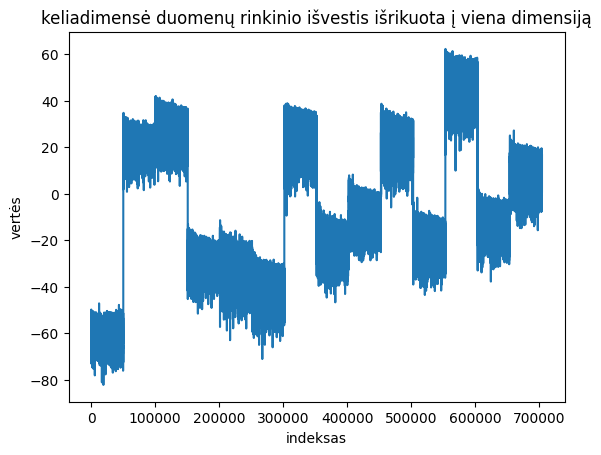

In [ ]:
eilute = logits2.value[0].cpu().numpy().flatten()
plt.plot(eilute) #cia vieno outputo
plt.ylabel('vertės')
plt.title('keliadimensė duomenų rinkinio išvestis išrikuota į viena dimensiją')
plt.xlabel('indeksas')

In [ ]:
logits2.value[0][0].cpu().numpy()

array([-58.59165, -66.70813, -58.5031 , ..., -66.4112 , -66.45798,
       -66.61482], dtype=float32)

In [ ]:
|fig, [ax,ax2] = plt.subplots(1,2, figsize=(14,5))#, sharey=True)

fig.suptitle('Sluoksnių atsakas į triukšmą.');

ax.set_ylabel('Atsitiktinio triukšmo dydis \n atskiriantis atspėjimus nuo neatspėjimų')
#ax.set_yticks(ticks=[1,2,3,4,5,6,7,8,9], labels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.scatter(layer_numbers, Index)
ax.set_xlabel('Mamba sluoksniai')
#ax2.set_ylabel('')

ax2.set_title('Gini indeksas')
ax2.scatter(layer_numbers, Gini)
ax2.set_xlabel('Mamba sluoksniai')
ax2.set_ylabel('Gini')

SyntaxError: invalid syntax (<ipython-input-18-95333b7dc6c8>, line 1)

In [ ]:
plt.scatter(layer_numbers, Sumos)
plt.xlabel('Mamba sluoksniai')
plt.ylabel('Teisingai nuspėjo Marry')
plt.title('Sluoksnių jautrumas triukšmui')
plt.yticks(ticks=[0,1,2,3,4,5,6,7,8,9,10])#),12,  25,50, 100], labels=['0/100','12/100','25/100','50/100','100/100'])

In [ ]:
x = Triuksmai
y = Atspejimas

import csv
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#%cd drive/My Drive/MIFBakis #lovely works nereik antra karta keisti

with open('suma.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(['layer','Sumos'])
    writer.writerows(zip(layer_numbers,Sumos))



In [ ]:
#@title fit ir išsaugomo rezultatą
# def
# issaugom i csv

import csv

with open('atspejo_antras.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(['layer','Index', 'Gini'])
    writer.writerows(zip(layer_numbers,Index, Gini))



#gražus pavaizdavimas su logistiniu pritaikymu
from scipy.optimize import curve_fit
import scipy.stats as stats

# Funkcija logistinės kreivės pritaikymui
def logistic_function(x, a, b):
    return 1 / (1 + np.exp(-(a * x + b)))

# Pritaikome kreivę
popt, pcov = curve_fit(logistic_function, x, y)

# Rezultatai
a, b = popt
print("Slankioji koeficiento (slope coefficient):", a)
print("Postūmio koeficientas (intercept coefficient):", b)



plt.xlabel('pridėto triukšmo lygis')
plt.ylabel('Atspėjo " Marry" ar ne')
plt.yticks(ticks=[0,1], labels=['neatspėjo', 'atspėjo'])


# Standard errors
se = np.sqrt(np.diag(pcov))

# Calculating t-values
t_values = popt / se

# Degrees of freedom
n = len(y)
p = len(popt)
dof = max(0, n - p)

# Calculating p-values
p_values = (1 - stats.t.cdf(np.abs(t_values), dof)) * 2

# Results
print("Coefficient estimates (a, b):", popt)
print("Standard errors:", se)
print("T-values:", t_values)
print("P-values:", p_values)

# Grafikas
plt.scatter(x, y, color='red', alpha = 0.2, s = 3, label='duomenys')
plt.plot(x, logistic_function(x, *popt), color='blue', label='pritaikyta sigmoidė')
plt.title('Logistinė regresija')
plt.fill_between(x, logistic_function(x, *(popt - se)), logistic_function(x, *(popt + se)), color='gray', alpha=0.3, label='68% pasitikėjimo intervalas')


plt.legend()

plt.show()

In [ ]:
#@title skirtingame sluoksnyje
#pridekime kitur realiai bilekur

prompt = "When Mary and John went to the store, John gave a drink to"


with mamba_model.invoke(prompt) as invoker:
    logits1 = mamba_model.lm_head.output.save()

print('nekeistas:\n>', spauda(logits1)[0],'\n---------------------------------')

#mamba_model.logging.set_verbosity_error()


layer_numbers = np.arange(0, 24)
sluoksnio_keitimas = np.zeros(24)


for layer_num in tqdm(layer_numbers):
    for i in range(10):
        with mamba_model.invoke(prompt) as invoker:
            hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx;
            hidden_states_pre = hx.output.clone().save();
            noise = 0.5*torch.randn(hidden_states_pre.shape);

            hx.output[0][:] = hidden_states_pre + noise

            logits2 = mamba_model.lm_head.output.save();

        if spauda(logits2, tik_paskutinis=True)[0] == ' Mary':
            sluoksnio_keitimas[layer_num] += 1

    #superstring += '\n>'+repr(spauda(logits2, tik_paskutinis = True)[0])

plt.scatter(layer_numbers, sluoksnio_keitimas)
plt.xlabel('SSM sluoksniai sunumeruoti')
plt.ylabel('Kiek atspėjo su 0.5 triukšmu')
plt.yticks(ticks = np.arange(0,11))
#plt.yticks(ticks=[0,1,2,3,4,5], labels=['0/5', '1/5','2/5', '3/5', '4/5',  'atspėjo visus 5/5'])

In [ ]:
layer_num = 20

'''
with mamba_model.invoke(prompt) as invoker:
    hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx
    hidden_states_pre = hx.output.clone().save()
    noise = 0.5*torch.randn(hidden_states_pre.shape)

    hx.output[0][:] = hidden_states_pre + noise

    logits2 = mamba_model.lm_head.output.save()

print('keistas hx:\n>', spauda(logits2))



with mamba_model.invoke(prompt) as invoker:
    discA = mamba_model.backbone.layers[layer_num].mixer.ssm.discA
    hidden_states_pre = discA.output.clone().save()
    noise = 0.5*torch.randn(hidden_states_pre.shape)

    discA.output[0][:] = hidden_states_pre + noise

    logits2 = mamba_model.lm_head.output.save()

print('keistas discA:\n>', spauda(logits2))
'''




prompt = "When Mary and John went to the store, John gave a drink to"

def pakeiski_x(x = 'B', s = 0.5, layer_num = 2):
    with mamba_model.invoke(prompt) as invoker:
        try:
            module = getattr(mamba_model.backbone.layers[layer_num].mixer, x)
        except:
            x1, x2 = x.split('.', 2)
            module = getattr(getattr(mamba_model.backbone.layers[layer_num].mixer, x1), x2)

        hidden_states_pre = module.output.clone().save()
        noise = 0.5*torch.randn(hidden_states_pre.shape)

        module.output[0][:] = hidden_states_pre + noise

        logits2 = mamba_model.lm_head.output.save()
    print(f'keistas modulis {repr(x)} su dydžio triukšmu = {s} hidden_states_pre.shape: {hidden_states_pre.shape}\n>', repr(spauda(logits2)[0]))
    print('-------------------------------------------------\n')





pakeiski_x('ssm.hx', s = 0.2, layer_num = 22)

#### Love

In [ ]:
with mamba_model.invoke(prompt) as invoker:
    hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx
    hidden_states_pre = hx.output.clone().save()
    noise = 0.5*torch.randn(hidden_states_pre.shape)

    hx.output[0][:] = hidden_states_pre + noise

    logits2 = mamba_model.lm_head.output.save()

print('keistas hx:\n>', spauda(logits2))
print(logits2.shape)

In [ ]:
#@title A matrica

mamba_model.backbone.layers[layer_num].mixer

Mamba_modelio_dalys = ['in_proj',
 'conv1d',
 'act',
 'dt',
 'B',
 'C',
'out_proj',
 'ssm']

ssm_dalys =['ssm.discA',
    'ssm.discB',
    'ssm.hx',

    'ssm.yh']

    #'ssm.hx.bx',
    #'ssm.hx.ah',

#x_proj give error
## 'dt_proj', idk but prob
# 'out_proj',
# 'delta_softplus' doesnt give error but gives <endoftext><endoftext> ...

In [ ]:
modelio_struktura = {
    'in_proj': 'Linear(in_features=768, out_features=3072, bias=False)',
    'conv1d': 'Conv1d(1536, 1536, kernel_size=(4,), stride=(1,), padding=(3,), groups=1536)',
    'act': 'SiLU()',
    'x_proj': 'Linear(in_features=1536, out_features=80, bias=False)',
    'dt_proj': 'Linear(in_features=48, out_features=1536, bias=True)',
    'out_proj': 'Linear(in_features=1536, out_features=768, bias=False)',
    'dt': 'WrapperModule()',
    'B': 'WrapperModule()',
    'C': 'WrapperModule()',
    'ssm': {
        'discA': 'DiscA()',
        'discB': 'DiscB()',
        'hx': {
            'bx': 'Bx()',
            'ah': 'Ah()'
        },
        'yh': 'Yh()'
    },
    'delta_softplus': None
}

#heyHo = list(modelio_struktura.keys())

prompt = "I want to stop this existence"
pakeiski_x(s=0.0)
for hoe in Mamba_modelio_dalys:
    pakeiski_x(hoe, s = 0.5, layer_num = 22)

In [ ]:
prompt = "Bob and Larry went to the city, Bob asked"

#pakeiski_x(s=0.0)
#for hoe in Mamba_modelio_dalys:
#    pakeiski_x(hoe, s = 0.5, layer_num = 22)

La dimensions 1, 16, 768, 1536 are fixed.
- 'conv1d' torch.Size([1, 1536, 9])  for  6 token input
- conv1d   torch.Size([1, 1536, 17]) for 14 token input
- ==> probably torch.Size([1,1536, len(x)+3])
O kiti tai tiesiogiai inputo ilgio yra



In [ ]:
pakeiski_x(s=0.0)

for hoe in Mamba_modelio_dalys:
    pakeiski_x(hoe, s = 1.5, layer_num = 10)

In [ ]:
pakeiski_x(s=0.0)

for hoe in ssm_dalys:
    pakeiski_x(hoe, s = 1.4, layer_num = 10)

In [ ]:
#@title Būtų kietai pasižiūrėti, kurie keičiasi, o kurie ne.

#kas jeigu tsg nekeisiu su noise ju ir paziuresiu ar skiriasi ar tie patys!
#keisiu prompta!


def keiciasi(x='B'):
    prompt = "fuck the"
    with mamba_model.invoke(prompt) as invoker:
        try:
            module = getattr(mamba_model.backbone.layers[layer_num].mixer, x)
        except:
            x1, x2 = x.split('.', 2)
            module = getattr(getattr(mamba_model.backbone.layers[layer_num].mixer, x1), x2)

        saveit = module.output.save()


    prompt = "I want it all and I want it"
    with mamba_model.invoke(prompt) as invoker:
        try:
            module = getattr(mamba_model.backbone.layers[layer_num].mixer, x)
        except:
            x1, x2 = x.split('.', 2)
            module = getattr(getattr(mamba_model.backbone.layers[layer_num].mixer, x1), x2)

        saveit2 = module.output.save()

    #print(x, saveit.value[0][0][0]==saveit2.value[0][0][0])
    print(x)
    print(saveit.value[0][0])
    print(saveit2.value[0][0])
    print('---------------------------------------')

In [ ]:
for x in Mamba_modelio_dalys:
    keiciasi(x)

In [ ]:
#@title kas per velnias tas noise
print(noise.mean(), noise.var())
print(len(noise[0][:]), noise.sum()/(len(noise[0][:])*14*16))
#
print('tai isviso ilgis yra: ',len(noise[0][:])*14*16) #no shit kad uztrunk biski operacijos


In [ ]:
plt.plot(noise[0][:])

In [ ]:
LongLongMan = noise[0][:].numpy().flatten()
plt.hist(LongLongMan, bins = 50)
plt.xlabel("vertė")
plt.ylabel("kiekis")
plt.rcParams['figure.dpi']=100
plt.figure(figsize=(4,4))

In [ ]:
plt.plot(LongLongMan)
plt.figure(figsize=(4,4))

In [ ]:
#kas jei padarytumem uniform skirstini


#@title skirtingame sluoksnyje
#pridekime kitur realiai bilekur

prompt = "When Mary and John went to the store, John gave a drink to"


with mamba_model.invoke(prompt) as invoker:
    logits1 = mamba_model.lm_head.output.save()

print('nekeistas:\n>', spauda(logits1)[0],'\n---------------------------------')

#mamba_model.logging.set_verbosity_error()


layer_numbers = np.arange(0, 24)
sluoksnio_keitimas = np.zeros(24)


for layer_num in tqdm(layer_numbers):
    for i in range(10):
        with mamba_model.invoke(prompt) as invoker:
            hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx;
            hidden_states_pre = hx.output.clone().save();
            noise = 0.5*torch.rand(hidden_states_pre.shape);

            hx.output[0][:] = hidden_states_pre + noise

            logits2 = mamba_model.lm_head.output.save();

        if spauda(logits2, tik_paskutinis=True)[0] == ' Mary':
            sluoksnio_keitimas[layer_num] += 1

    #superstring += '\n>'+repr(spauda(logits2, tik_paskutinis = True)[0])

plt.scatter(layer_numbers, sluoksnio_keitimas)
plt.xlabel('SSM sluoksniai sunumeruoti')
plt.ylabel('Kiek atspėjo su 0.5 triukšmu')
plt.yticks(ticks = np.arange(0,11))
#plt.yticks(ticks=[0,1,2,3,4,5], labels=['0/5', '1/5','2/5', '3/5', '4/5',  'atspėjo visus 5/5'])

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
#for i in tqdm(range(100)):
 #    sleep(3)


prompt = "When Mary and John went to the store, John gave a drink to"


with mamba_model.invoke(prompt) as invoker:
    logits1 = mamba_model.lm_head.output.save()

print('nekeistas:\n>', spauda(logits1)[0],'\n---------------------------------')

#mamba_model.logging.set_verbosity_error()

#Triuksmai = np.linspace(0,1,1000)

Triuksmai = np.linspace(0,1,10)
Atspejimas = []
Gini = []
Index = []
layer_numbers = np.arange(0,24)
Sumos = []
for layer_num in tqdm(layer_numbers):
    Atspejimas = []



    for i in tqdm(Triuksmai):
        with mamba_model.invoke(prompt) as invoker:
            hx = mamba_model.backbone.layers[layer_num].mixer.ssm.hx;
            hidden_states_pre = hx.output.clone().save();
            noise = (i)*torch.rand(hidden_states_pre.shape);

            hx.output[0][:] = hidden_states_pre + noise

            logits2 = mamba_model.lm_head.output.save();

        if spauda(logits2, tik_paskutinis=True)[0] == ' Mary':
            Atspejimas.append(1)
        else:
            Atspejimas.append(0)
        print(spauda(logits2, tik_paskutinis=True)[0])
        #superstring += '\n>'+repr(spauda(logits2, tik_paskutinis = True)[0])

    index = find_split_index(Atspejimas)
    Index.append(index)
    gini = gini_impurity(Atspejimas[:index])+gini_impurity(Atspejimas[index:])
    Gini.append(gini)
    Sumos.append(np.sum(Atspejimas))
    #plt.scatter(Triuksmai, Atspejimas, alpha = 0.2, s = 3)
    #plt.xlabel('Triukšmo lygis, didesnis daugiau triukšmo')
    #plt.ylabel('atspėjo ar neatspėjau')
    #plt.yticks(ticks=[0,1], labels=['neatspėjo', 'atspėjo'])
    #plt.show()
    #nu va iesoj pakeisti

#okey, manau pagaunu, čia tik pats paskutinis yra esminis žodis, nes
#duoda nuo pradžios
# Tarkim inputo teksto vienetai = [a, b, c], o ouputo = [x, y, z]
# [a] -> x
# [a, b] -> y
# [a, b, c] -> z

#TV(' Mary')== 6393

In [ ]:
LongLongMan = noise[0][:].numpy().flatten()
plt.hist(LongLongMan, bins = 20)
plt.xlabel("vertė")
plt.ylabel("kiekis")
plt.rcParams['figure.dpi']=100
plt.figure(figsize=(4,4))

# Kas veikia neveikia, mintys

## Po biški valgom dramblį! :)


* Biblioteka nnsight
 ```
 mamba_model.trace(input)
 ```
 Neveikia abiem 100k ir 130M modeliams
*  Abiem modeliams užtad veikia invoke
```
mamba_model_tiny = MambaInterp("MrGonao/delphi-mamba-100k", device="cuda")
with mamba_model_tiny.invoke(prompt) as invoker:
    logits = mamba_model_tiny.lm_head.output.save()
```

* Netiesioginis objektas?
Na tai tiesiog vertimas indirect object.
Gal verčiau reiktų, sakyti, neesamo ahm, net nežinau.


* mažas ir didelis modelis:
```
logits <nnsight.intervention.InterventionProxy object at 0x7ab0edd09180>
 ---------------------
 ---------------------
mamba_big =  MambaLMHeadModel(
  (backbone): MixerModel(
    (embedding): Embedding(50280, 768)
    (layers): ModuleList(
      (0-23): 24 x Block(
        (mixer): MambaModuleInterp(
          (in_proj): Linear(in_features=768, out_features=3072, bias=False)
          (conv1d): Conv1d(1536, 1536, kernel_size=(4,), stride=(1,), padding=(3,), groups=1536)
          (act): SiLU()
          (x_proj): Linear(in_features=1536, out_features=80, bias=False)
          (dt_proj): Linear(in_features=48, out_features=1536, bias=True)
          (out_proj): Linear(in_features=1536, out_features=768, bias=False)
          (dt): WrapperModule()
          (B): WrapperModule()
          (C): WrapperModule()
          (ssm): SSM(
            (discA): DiscA()
            (discB): DiscB()
            (hx): Hx(
              (bx): Bx()
              (ah): Ah()
            )
            (yh): Yh()
          )
          (delta_softplus): Softplus(beta=1, threshold=20)
        )
        (norm): RMSNorm()
      )
    )
    (norm_f): RMSNorm()
  )
  (lm_head): Linear(in_features=768, out_features=50280, bias=False)
)
```


```
with mamba.invoke("Question ") as invoker:
    logit = mamba.lm_head.output.save()
logit.value.shape
```
 didelis duoda
 ```torch.Size([1, 5, 50280]))```


mažas mamba ```torch.Size([1, 17, 4096]))```

- forward, generate, inference yra sinonimai reiškiantys, jog duodam modeliui įvestį ir jis duos išvestį. Nežinau kaip lietuviškia. Gal tsg modelio generavimas ar kažkas tokio.



In [ ]:
5*50280


251400

In [ ]:
17*4096

69632

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [ ]:
#pabandom outputą pamodeliuot, ką gaunam.
